In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#read in cleaned data 

df_fashionnova = pd.read_csv('FashionNova_Data_output.csv')
df_target = pd.read_csv('Target_Data_Output.csv')
df_kohls = pd.read_csv('Khols_Data_outputCLEAN.csv')
df_aday = pd.read_csv('Aday_Cleaned.csv')
df_thereformation = pd.read_csv('ThereFormation_Cleaned.csv')
df_shein = pd.read_csv('Shein_cleaned.csv')

In [3]:
#df_target.head()
df_target = df_target.sort_values(by='Price', ascending=False)
df_target.head()

,Unnamed: 0,Cloth_Desc,Price
0,5,Plush Cotton Unisex Adult Bathrobe - Blue Nile...,58.49
1,30,"Alexander Del Rossa Women's Warm Winter Robe, ...",49.99
2,903,Hope & Henry Womens' Short Sleeve A-Line Dress,49.95
3,679,High Neck Swim Romper with Pockets One Piece S...,47.50
4,480,Waist Detail Over the Shoulder One Piece Swims...,47.50


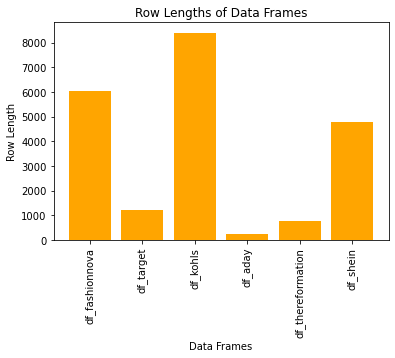

In [4]:
#make a graph that compares the lengths of the data

dfs = ['df_fashionnova', 'df_target', 'df_kohls', 'df_aday', 'df_thereformation', 'df_shein']
row_lengths = [len(df_fashionnova), len(df_target), len(df_kohls), len(df_aday), len(df_thereformation), len(df_shein)]

plt.bar(dfs, row_lengths, color='orange')
plt.title('Row Lengths of Data Frames')
plt.xlabel('Data Frames')
plt.ylabel('Row Length')

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.show()


In [5]:
'''
This bar graph presents a snapshot of data scraped in February 2023, indicating the row lengths of six data frames: 
df_fashionnova, df_target, df_kohls, df_aday, df_thereformation, and df_shein. It is important to note that this data may 
not necessarily represent the current numbers of each retailer, but provides insight into what may be observed on their 
websites at the time of scraping. Furthermore, the focus of the data was specifically on women's items, in order to maintain
consistency throughout the analysis.

According to the graph, the largest row length belongs to df_kohls, with a significantly higher count compared to the other 
retailers. This observation aligns with the fact that Kohl's is the second largest department store in the United States 
based on sales in 2021, following Macy's. Despite initial success in scraping Macy's, access was eventually blocked, 
suggesting a strong security system in place.

The second highest row length belongs to df_fashionnova, a fast fashion retailer that primarily caters to women's fashion 
items. This observation is not surprising, given the company's focus on providing trendy, affordable fashion pieces to its 
primarily female customer base.

In third place is df_shein, which has recently become the largest fast fashion retailer, surpassing well-established 
companies such as Zara and H&M. However, it is interesting to note that despite being known for fast fashion, the website 
offers a diverse range of products, including children's unisex, men's, and ungendered items.

In fourth place is df_target, with a significantly lower row length compared to the previous three retailers. This suggests 
that Target's women's fashion selection may not be as extensive as that of other larger retailers. In fact, the row length 
of df_target is more comparable to sustainable retailers, such as df_aday and df_thereformation.

Both df_aday and df_thereformation have row lengths below 1000, indicating that their selection of women's items is 
significantly smaller compared to other retailers. However, it is important to note that these sustainable retailers follow
ethical business practices, such as being zero waste and treating their employees with dignity.

In conclusion, this bar graph provides valuable insights into the selection of women's items offered by various retailers. 
While the data may not be reflective of the current numbers, it does suggest trends in the fashion industry and highlights 
the contrasting business models of fast fashion and sustainable retailers.
'''

"\nThis bar graph presents a snapshot of data scraped in February 2023, indicating the row lengths of six data frames: \ndf_fashionnova, df_target, df_kohls, df_aday, df_thereformation, and df_shein. It is important to note that this data may \nnot necessarily represent the current numbers of each retailer, but provides insight into what may be observed on their \nwebsites at the time of scraping. Furthermore, the focus of the data was specifically on women's items, in order to maintain\nconsistency throughout the analysis.\n\nAccording to the graph, the largest row length belongs to df_kohls, with a significantly higher count compared to the other \nretailers. This observation aligns with the fact that Kohl's is the second largest department store in the United States \nbased on sales in 2021, following Macy's. Despite initial success in scraping Macy's, access was eventually blocked, \nsuggesting a strong security system in place.\n\nThe second highest row length belongs to df_fashio

In [6]:
#this function counts the words and will be used throughout this noteboook

def count_cloth_words(df):
    cloth_word_lst = []
    for item in df['Cloth_Desc']:
        item = item.split()
        for thing in item:
            cloth_word_lst.append(thing)
    return Counter(cloth_word_lst)

khols_word_count = count_cloth_words(df_kohls)
target_word_count = count_cloth_words(df_target)
fashionnova_word_count = count_cloth_words(df_fashionnova)
aday_word_count = count_cloth_words(df_aday)
thereformation_word_count = count_cloth_words(df_thereformation)
shein_word_count = count_cloth_words(df_shein)

In [7]:
def count_cloth_words(df):
    cloth_word_lst = []
    for item in df['Cloth_Desc']:
        item = item.split()
        for thing in item:
            cloth_word_lst.append(thing)
    return Counter(cloth_word_lst)

khols_word_count = count_cloth_words(df_kohls)
khols_filtered_word_count = count_cloth_words(df_kohls)
target_word_count = count_cloth_words(df_target)
target_filtered_word_count = count_cloth_words(df_target)
fashionnova_word_count = count_cloth_words(df_fashionnova)
fashionnova_filtered_word_count = count_cloth_words(df_fashionnova)
aday_word_count = count_cloth_words(df_aday)
aday_filtered_word_count = count_cloth_words(df_aday)
thereformation_word_count = count_cloth_words(df_thereformation)
thereformation_filtered_word_count = count_cloth_words(df_thereformation)
shein_filtered_word_count = count_cloth_words(df_shein)
shein_word_count = count_cloth_words(df_shein)

In [8]:
'''
We made our analysis more accurate by getting rid of unnecessary words that could have misled our findings. These words 
included brand names and labels that were specific to brands, as well as repetitive characters that added no value to our 
analysis. This helped us focus on the most important words that are commonly used by different retailers to describe their 
clothing items. By doing so, we can draw better conclusions and insights about the fashion industry, and how retailers 
compete with each other.
'''

'\nWe made our analysis more accurate by getting rid of unnecessary words that could have misled our findings. These words \nincluded brand names and labels that were specific to brands, as well as repetitive characters that added no value to our \nanalysis. This helped us focus on the most important words that are commonly used by different retailers to describe their \nclothing items. By doing so, we can draw better conclusions and insights about the fashion industry, and how retailers \ncompete with each other.\n'

In [9]:
#cleaning for khols to get rid of filler words that are not great for comparison 

del khols_filtered_word_count["Women's"]
del khols_filtered_word_count['...']
del khols_filtered_word_count['Plus']
del khols_filtered_word_count['Size']
del khols_filtered_word_count["Juniors'"]
del khols_filtered_word_count["Lands'"]
del khols_filtered_word_count['End']
del khols_filtered_word_count['Petite']
del khols_filtered_word_count['Alfred']
del khols_filtered_word_count['Dunner']
del khols_filtered_word_count['&']
del khols_filtered_word_count['Nina']
del khols_filtered_word_count['Leonard']
del khols_filtered_word_count['For']
del khols_filtered_word_count['Vera']
del khols_filtered_word_count['Sonoma']

In [10]:
#cleaning for target to get rid of filler words that are not great for comparison 

del target_filtered_word_count['-']
del target_filtered_word_count['4-10']
del target_filtered_word_count['Day']
del target_filtered_word_count["Women's"]
del target_filtered_word_count['Wild']
del target_filtered_word_count['Fable']
del target_filtered_word_count['A']
del target_filtered_word_count['New']
del target_filtered_word_count['6pk']
del target_filtered_word_count['All']
del target_filtered_word_count['in']
del target_filtered_word_count['Auden']
del target_filtered_word_count['Xhilaration']
del target_filtered_word_count['Universal']
del target_filtered_word_count['Thread']
del target_filtered_word_count['Motion']
del target_filtered_word_count['&']
del target_filtered_word_count['Hanes']

In [11]:
#cleaning for fashionnova to get rid of filler words that are not great for comparison 

del fashionnova_filtered_word_count['-']
del fashionnova_filtered_word_count['The']
del fashionnova_filtered_word_count['Me']

In [12]:
#cleaning for aday to get rid of filler words that are not great for comparison 

del aday_filtered_word_count['It']
del aday_filtered_word_count['Up']
del aday_filtered_word_count['A']
del aday_filtered_word_count['Something']
del aday_filtered_word_count['Like']
del aday_filtered_word_count['Borrowed']

In [303]:
del shein_filtered_word_count['SHEIN']

In [304]:
'''
here we printed just the wod counts to filter the ones that needed to be filterd out
'''
print(shein_word_count)
#print(khols_word_count)
#print(aday_word_count)
#print(thereformation_word_count)

Counter({'SHEIN': 1812, 'Dress': 1385, 'Print': 845, 'Solid': 806, 'Top': 775, 'Neck': 772, 'Sleeve': 668, 'Shoulder': 638, 'Hem': 567, 'Crop': 547, 'Tee': 499, 'Floral': 490, 'Bikini': 444, 'Tie': 441, 'Front': 424, '&': 420, 'Cami': 419, 'Drop': 419, 'Swimsuit': 403, 'SXY': 351, 'EZwear': 304, 'Ruffle': 285, 'Trim': 284, 'Waist': 283, 'High': 275, 'Bodycon': 263, 'Halter': 263, 'Ruched': 259, 'Sweater': 253, 'Up': 253, 'Split': 251, 'Blouse': 249, 'Back': 247, 'Knit': 244, 'Cut': 242, 'EMERY': 242, 'ROSE': 242, 'Backless': 239, 'Tank': 228, 'Graphic': 219, 'Out': 203, 'Unity': 202, 'Pants': 199, 'Leg': 185, 'Skirt': 184, 'Drawstring': 182, 'Side': 180, 'VCAY': 180, 'Pocket': 179, 'Button': 177, 'Allover': 176, 'Letter': 175, 'Lace': 175, 'Knot': 169, 'Thigh': 165, 'Jeans': 157, 'Tube': 153, 'BAE': 148, 'Detail': 145, 'Ribbed': 145, 'Shorts': 144, 'Belted': 143, 'Zip': 141, 'ICON': 138, 'Ditsy': 137, 'Mock': 136, 'Contrast': 133, 'DAZY': 127, 'Mesh': 127, 'Triangle': 125, 'One': 125, 

In [305]:
#function to make a graoh of the most frequent words

def plot_top_words(word_counts, name):
    # Get the top 10 most frequent words
    title = 'Top 10 Most Frequent Words in Cloth_Desc ' + name
    top_words = word_counts.most_common(10)
    

    
    # Create a bar graph
    x_labels = [word[0] for word in top_words]
    y_values = [word[1] for word in top_words]
    
    plt.bar(x_labels, y_values)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

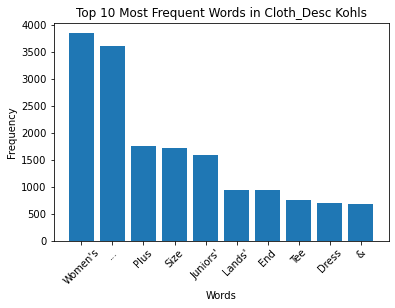

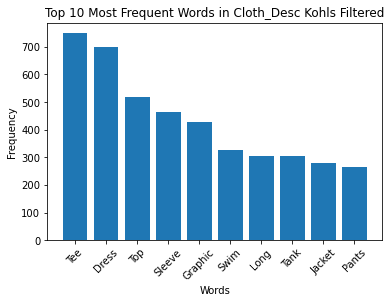

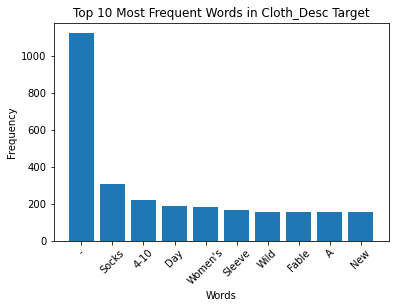

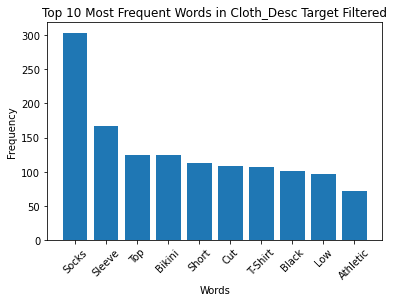

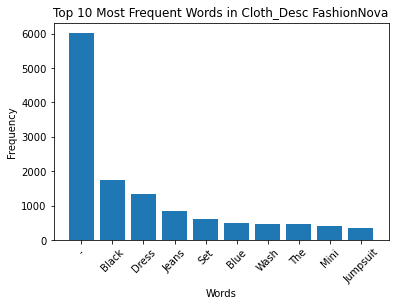

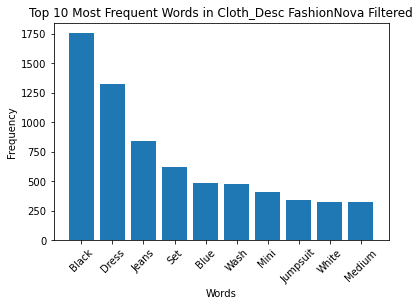

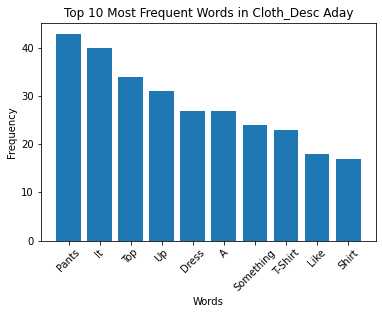

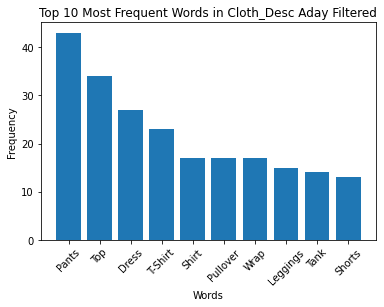

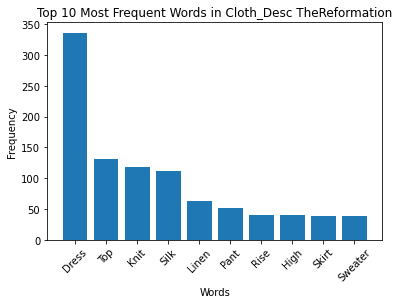

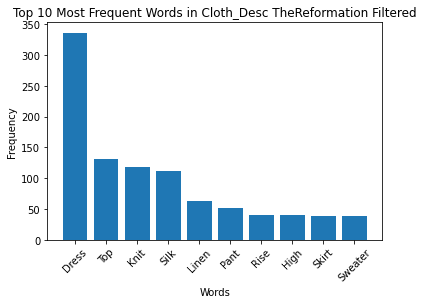

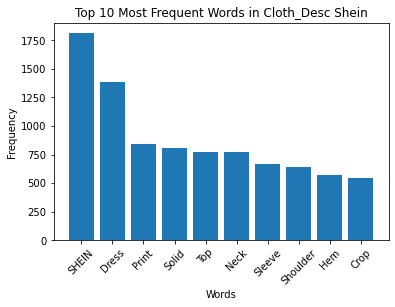

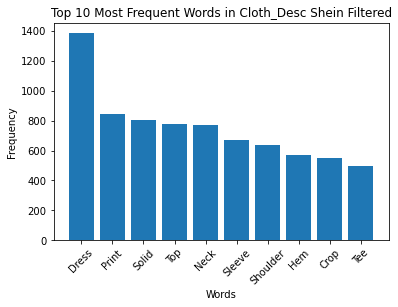

In [306]:
#here there are 2 plots the filtered and unfiltered to prove that it needs to be filtered

plot_top_words(khols_word_count, 'Kohls')
plot_top_words(khols_filtered_word_count, 'Kohls Filtered')
plot_top_words(target_word_count, 'Target')
plot_top_words(target_filtered_word_count, 'Target Filtered')
plot_top_words(fashionnova_word_count, 'FashionNova')
plot_top_words(fashionnova_filtered_word_count, 'FashionNova Filtered')
plot_top_words(aday_word_count, 'Aday')
plot_top_words(aday_filtered_word_count, 'Aday Filtered')
plot_top_words(thereformation_word_count, 'TheReformation')
plot_top_words(thereformation_filtered_word_count, 'TheReformation Filtered')
plot_top_words(shein_word_count, 'Shein')
plot_top_words(shein_filtered_word_count, 'Shein Filtered')

In [17]:
'''
Based on the word count analysis, it seems that the words "Jeans" and "Pants" appeared frequently in the top 10 most common
words for several clothing companies, including Kohl's, Target, and Shein. This suggests that these items may be popular
among customers of these companies.

To explore this further, we can dig deeper into the data and analyze the trends and patterns related to jeans and pants. 
For example, we can investigate the types of jeans and pants that are popular, the price range for these items, and any 
seasonal or regional variations in demand.
'''

'\nBased on the word count analysis, it seems that the words "Jeans" and "Pants" appeared frequently in the top 10 most common\nwords for several clothing companies, including Kohl\'s, Target, and Shein. This suggests that these items may be popular\namong customers of these companies.\n\nTo explore this further, we can dig deeper into the data and analyze the trends and patterns related to jeans and pants. \nFor example, we can investigate the types of jeans and pants that are popular, the price range for these items, and any \nseasonal or regional variations in demand.\n'

In [18]:
#function to count words and filter for bottoms
#below we are going to repeat what we did above for tops and bottoms
def filter_cloth_desc_bottoms(df):
    # Filter the "Cloth_Desc" column to only include rows with "Jeans" or "Pants"
    filtered = df[df['Cloth_Desc'].str.contains('Jeans|Pants')]
    
    # Create a new dataframe with just the filtered rows
    company_bottoms = pd.DataFrame(filtered)
    
    return company_bottoms

In [19]:
kohls_bottoms = filter_cloth_desc_bottoms(df_kohls)
target_bottoms = filter_cloth_desc_bottoms(df_target)
fashionnova_bottoms = filter_cloth_desc_bottoms(df_fashionnova)
aday_bottoms = filter_cloth_desc_bottoms(df_aday)
thereformation_bottoms = filter_cloth_desc_bottoms(df_thereformation)
shein_bottoms = filter_cloth_desc_bottoms(df_shein)

In [20]:
def count_cloth_words(df):
    cloth_word_lst = []
    for item in df['Cloth_Desc']:
        item = item.split()
        for thing in item:
            cloth_word_lst.append(thing)
    return Counter(cloth_word_lst)

bottoms_khols_word_count = count_cloth_words(kohls_bottoms)
bottoms_target_word_count = count_cloth_words(target_bottoms)
bottoms_fashionnova_word_count = count_cloth_words(fashionnova_bottoms)
bottoms_aday_word_count = count_cloth_words(aday_bottoms)
bottoms_thereformation_word_count = count_cloth_words(thereformation_bottoms)
bottoms_shein_word_count = count_cloth_words(shein_bottoms)

In [21]:
print(bottoms_shein_word_count)

Counter({'Pants': 199, 'SHEIN': 182, 'Leg': 169, 'Jeans': 157, 'Waist': 130, 'High': 104, 'Pocket': 72, '&': 66, 'Wide': 64, 'Flare': 56, 'Straight': 53, 'Flap': 46, 'Ripped': 45, 'Solid': 43, 'Cargo': 39, 'EZwear': 37, 'Skinny': 34, 'Print': 33, 'SXY': 32, 'Slant': 30, 'Drawstring': 26, 'Detail': 25, 'PETITE': 25, 'Top': 25, 'Hem': 23, 'Leather': 22, 'Fly': 22, 'Front': 22, 'Unity': 21, 'Zipper': 19, 'Blazer': 19, 'Cut': 18, 'Crop': 18, 'PU': 17, 'Neck': 17, 'Side': 16, 'Raw': 16, 'Zip': 15, 'Up': 14, 'Out': 14, 'DAZY': 14, 'Tall': 12, 'Shoulder': 12, 'ICON': 11, 'Suit': 11, 'Floral': 11, 'VCAY': 11, 'Button': 10, 'Waisted': 10, 'BAE': 10, 'Set': 10, 'Ruched': 9, 'Split': 9, 'Bootcut': 9, 'Washed': 9, 'Wash': 8, 'Shawl': 8, 'Open': 8, 'Boyfriend': 8, 'Drop': 8, 'Tee': 8, 'Cami': 8, 'X': 7, 'Tailored': 7, 'Light': 7, 'Knot': 7, 'Pockets': 7, 'Look': 6, 'Bleach': 6, 'EMERY': 6, 'ROSE': 6, 'Frayed': 6, 'Frenchy': 6, 'Patched': 6, 'Elastic': 6, 'Tie': 6, 'Parachute': 6, 'Plaid': 5, 'Cover

In [22]:
'''
Filtering data can still be beneficial even if we are just interested in a specific category such as pants. By filtering 
out irrelevant data, we can narrow our focus and gain more insights into the specific category we are interested in.'''

'\nFiltering data can still be beneficial even if we are just interested in a specific category such as pants. By filtering \nout irrelevant data, we can narrow our focus and gain more insights into the specific category we are interested in.'

In [23]:
del bottoms_khols_word_count["Women's"]
del bottoms_khols_word_count['...']
del bottoms_khols_word_count['Plus']
del bottoms_khols_word_count['Size']
del bottoms_khols_word_count["Juniors'"]
del bottoms_khols_word_count["Lands'"]
del bottoms_khols_word_count['End']
del bottoms_khols_word_count['Petite']
del bottoms_khols_word_count['Alfred']
del bottoms_khols_word_count['Dunner']
del bottoms_khols_word_count['&']
del bottoms_khols_word_count['Nina']
del bottoms_khols_word_count['Leonard']
del bottoms_khols_word_count['For']
del bottoms_khols_word_count['Vera']
del bottoms_khols_word_count['Sonoma']
del bottoms_khols_word_count['Pants']

In [24]:
del bottoms_target_word_count["-"]
del bottoms_target_word_count["A"]
del bottoms_target_word_count["New"]
del bottoms_target_word_count["Day"]
del bottoms_target_word_count["Wild"]
del bottoms_target_word_count["Fable"]
del bottoms_target_word_count["Universal"]
del bottoms_target_word_count["Thread"]
del bottoms_target_word_count["Pants"]
del bottoms_target_word_count["Above"]
del bottoms_target_word_count["Stars"]

In [25]:
del bottoms_fashionnova_word_count["-"]
del bottoms_fashionnova_word_count["Medium"]
del bottoms_fashionnova_word_count["Pants"]

In [26]:
del bottoms_aday_word_count["Up"]
del bottoms_aday_word_count["It"]
del bottoms_aday_word_count["Pants"]
del bottoms_aday_word_count["Days"]

In [27]:
del bottoms_thereformation_word_count["Cynthia"]
del bottoms_thereformation_word_count["Liza"]

In [28]:
del bottoms_shein_word_count["Pants"]
del bottoms_shein_word_count["SHEIN"]
del bottoms_shein_word_count["Leg"]
del bottoms_shein_word_count["&"]

In [29]:
print(bottoms_target_word_count)

Counter({'High-Rise': 36, 'Jeans': 30, 'Straight': 17, 'Slim': 13, 'Wash': 12, 'Super-High': 12, 'Rise': 12, 'Jogger': 12, 'Ankle': 12, 'Fit': 11, 'Leg': 11, 'Skinny': 11, 'Mid-Rise': 9, 'Flare': 8, 'Wide': 8, 'Pajama': 8, 'Soft': 7, 'Lounge': 7, 'Pull-On': 7, 'Black': 7, 'All': 6, 'in': 6, 'Motion': 6, 'Maternity': 6, 'Isabel': 6, 'Beautifully': 6, 'Tapered': 5, 'Knox': 5, 'Rose': 5, 'Medium': 5, 'Cozy': 5, 'Distressed': 5, 'Utility': 4, '&': 4, "Women's": 4, 'Waist': 4, 'Colsie': 4, 'Cargo': 3, 'Light': 3, 'Stretch': 3, 'by': 3, 'Ingrid': 3, 'Knit': 3, 'Kick': 3, 'Woven': 3, 'Taper': 3, 'Blue': 3, 'Mom': 3, 'Graphic': 3, 'Ribbed': 3, 'Fleece': 3, 'Perfectly': 3, 'with': 2, 'Boyfriend': 2, 'Linen': 2, 'Fluid': 2, 'French': 2, 'Terry': 2, 'Over': 2, 'Belly': 2, 'Dark': 2, 'DENIZEN®': 2, 'from': 2, "Levi's®": 2, 'Cropped': 2, 'Contour': 2, 'Power': 2, 'Cover': 2, 'Up': 2, 'Brown': 2, 'Gray': 2, 'Legging': 2, 'Print': 2, 'Future': 1, 'Collective': 1, 'Gabriella': 1, 'Karefa-Johnson': 1, 

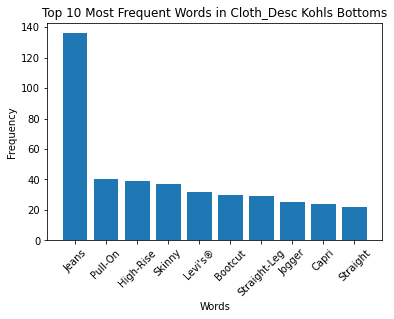

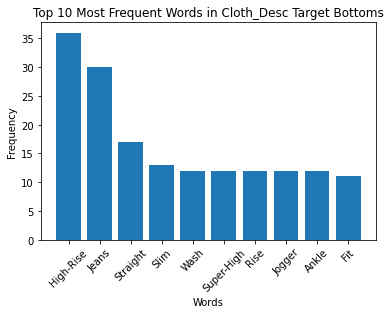

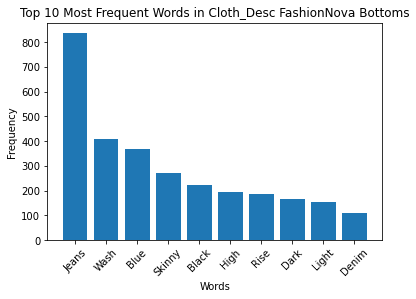

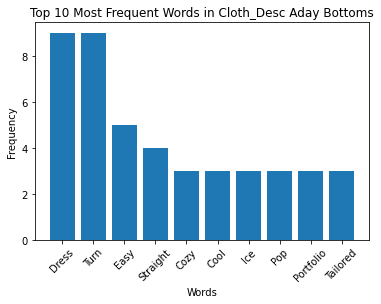

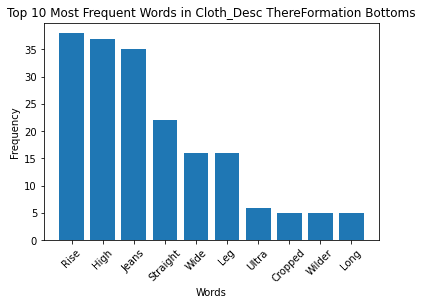

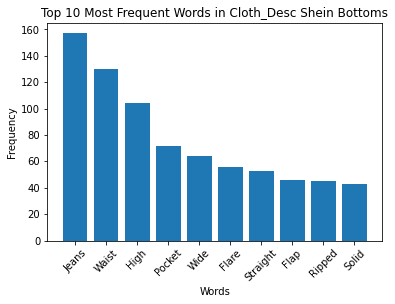

In [298]:
plot_top_words(bottoms_khols_word_count, 'Kohls Bottoms')
plot_top_words(bottoms_target_word_count, 'Target Bottoms')
plot_top_words(bottoms_fashionnova_word_count, 'FashionNova Bottoms')
plot_top_words(bottoms_aday_word_count, 'Aday Bottoms')
plot_top_words(bottoms_thereformation_word_count, 'ThereFormation Bottoms')
plot_top_words(bottoms_shein_word_count, 'Shein Bottoms')

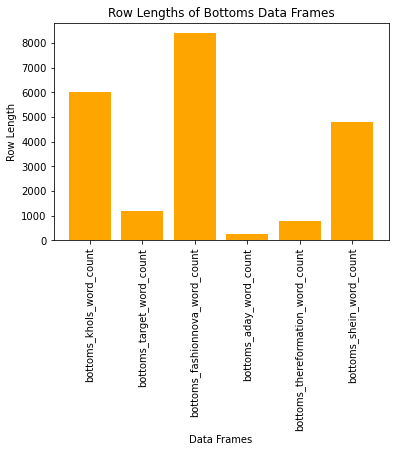

In [31]:
dfs = ['bottoms_khols_word_count', 'bottoms_target_word_count', 'bottoms_fashionnova_word_count', \
       'bottoms_aday_word_count', 'bottoms_thereformation_word_count', 'bottoms_shein_word_count']
row_lengths = [len(df_fashionnova), len(df_target), len(df_kohls), len(df_aday), len(df_thereformation), len(df_shein)]

plt.bar(dfs, row_lengths, color='orange')
plt.title('Row Lengths of Bottoms Data Frames')
plt.xlabel('Data Frames')
plt.ylabel('Row Length')

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.show()


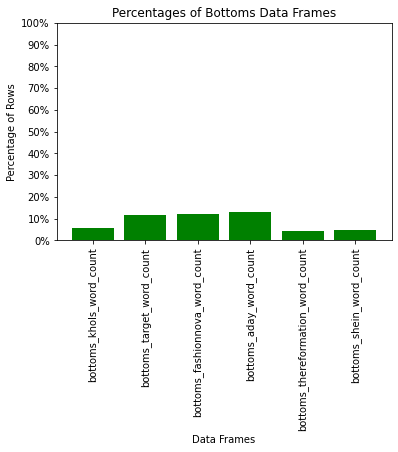

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataframes row lengths
df_lengths = [len(df_fashionnova), len(df_target), len(df_kohls), len(df_aday), len(df_thereformation), len(df_shein)]

# Bottoms dataframes row lengths
bottoms_lengths = [len(bottoms_khols_word_count), len(bottoms_target_word_count), len(bottoms_fashionnova_word_count), \
                   len(bottoms_aday_word_count), len(bottoms_thereformation_word_count), len(bottoms_shein_word_count)]

# Calculate percentages
percentages = np.round(np.array(bottoms_lengths) / np.array(df_lengths) * 100, 2)

# Plot the percentages
plt.bar(dfs, percentages, color='green')
plt.title('Percentages of Bottoms Data Frames')
plt.xlabel('Data Frames')
plt.ylabel('Percentage of Rows')

# Set y-axis tick marks to display percentages
plt.yticks(np.arange(0, 101, 10))
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{int(x)}%')

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.show()

In [33]:
'''
Though aday has the smallest set overall, in comparison their bottoms occur in the highest frequncy for our analysis.
'''

'\nThough aday has the smallest set overall, in comparison their bottoms occur in the highest frequncy for our analysis.\n'

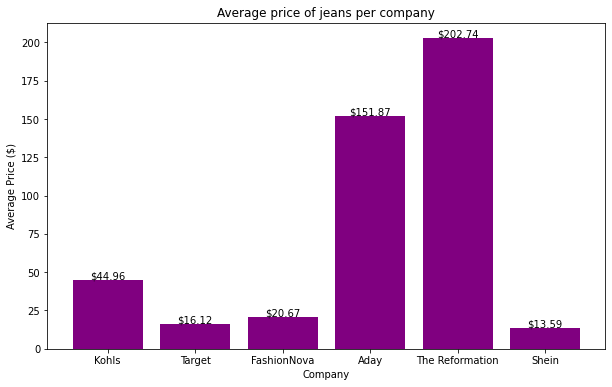

In [353]:
# Define the item name and list of companies
itemname = 'jeans'
companies = ['Kohls', 'Target', 'FashionNova', 'Aday', 'The Reformation', 'Shein']

# Define a list to store the output DataFrames
output_dfs = []

# Calculate the average price of jeans for each company
for company, df in zip(companies, [df_kohls, df_target, df_fashionnova, df_aday, df_thereformation, df_shein]):
    if company == 'Kohls':
        output_dfs.append(avg_jeans_kohls)
    elif company == 'Target':
        output_dfs.append(avg_jeans_target)
    elif company == 'FashionNova':
        output_dfs.append(avg_jeans_fashionnova)
    elif company == 'Aday':
        output_dfs.append(avg_jeans_aday)
    elif company == 'The Reformation':
        output_dfs.append(avg_jeans_thereformation)
    elif company == 'Shein':
        output_dfs.append(avg_jeans_shein)

# Concatenate the output DataFrames into a single DataFrame
df_concat = pd.concat(output_dfs, ignore_index=True)

# Create a bar chart of the average price of jeans for each company
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_concat['Company'], df_concat['Average_Price'], color='purple')
ax.set_xlabel('Company')
ax.set_ylabel('Average Price ($)')
ax.set_title(f'Average price of {itemname} per company')

# Add labels to the top of each bar
for i, v in enumerate(df_concat['Average_Price']):
    ax.text(i, v + 0.5, f'${v:.2f}', ha='center')

plt.show()

In [344]:
avg_jeans_kohls = avg_price_by_itemname(df_kohls, 'Kohls', 'jeans')
avg_jeans_target = avg_price_by_itemname(df_target, 'Target', 'jeans')
avg_jeans_fashionnova = avg_price_by_itemname(df_fashionnova, 'FashionNova', 'jeans')
avg_jeans_aday = avg_price_by_itemname(df_aday, 'Aday', 'jeans')
avg_jeans_thereformation = avg_price_by_itemname(df_thereformation, 'The Reformation', 'jeans')
avg_jeans_shein = avg_price_by_itemname(df_shein, 'Shein', 'jeans')

avg_jeans_thereformation.head()

,Company,Item,Average_Price
0,The Reformation,jeans,202.74


In [ ]:
avg_top_kohls = avg_price_by_itemname(df_kohls, 'Kohls', 'jeans')
avg_top_target = avg_price_by_itemname(df_target, 'Target', 'jeans')
avg_top_fashionnova = avg_price_by_itemname(df_fashionnova, 'FashionNova', 'jeans')
avg_top_aday = avg_price_by_itemname(df_aday, 'Aday', 'jeans')
avg__thereformation = avg_price_by_itemname(df_thereformation, 'The Reformation', 'jeans')
avg_jeans_shein = avg_price_by_itemname(df_shein, 'Shein', 'jeans')

In [34]:
def filter_cloth_desc_tops(df):
    # Filter the "Cloth_Desc" column to only include rows with "Jeans" or "Pants"
    filtered = df[df['Cloth_Desc'].str.contains('Top|Tee|T-Shirt|Shirt')]
    
    # Create a new dataframe with just the filtered rows
    company_tops = pd.DataFrame(filtered)
    
    return company_tops

In [35]:
kohls_tops = filter_cloth_desc_tops(df_kohls)
target_tops = filter_cloth_desc_tops(df_target)
fashionnova_tops = filter_cloth_desc_tops(df_fashionnova)
aday_tops = filter_cloth_desc_tops(df_aday)
thereformation_tops = filter_cloth_desc_tops(df_thereformation)
shein_tops = filter_cloth_desc_tops(df_shein)

In [36]:
tops_khols_word_count = count_cloth_words(kohls_tops)
tops_target_word_count = count_cloth_words(target_tops)
tops_fashionnova_word_count = count_cloth_words(fashionnova_tops)
tops_aday_word_count = count_cloth_words(aday_tops)
tops_thereformation_word_count = count_cloth_words(thereformation_tops)
tops_shein_word_count = count_cloth_words(shein_tops)

In [37]:
print(tops_shein_word_count)

Counter({'Top': 775, 'SHEIN': 676, 'Tee': 499, 'Crop': 464, 'Solid': 288, '&': 283, 'Neck': 247, 'Shoulder': 202, 'Print': 188, 'Tank': 179, 'Drop': 150, 'Front': 149, 'EZwear': 147, 'Cami': 140, 'Graphic': 138, 'Sleeve': 133, 'Knit': 132, 'Hem': 128, 'SXY': 99, 'Tie': 99, 'ICON': 95, 'Tube': 95, 'Halter': 94, 'Letter': 89, 'Shirt': 86, 'Skirt': 83, 'Ribbed': 79, 'Unity': 75, 'Button': 74, 'Backless': 73, 'Lace': 72, 'Back': 70, 'Twist': 66, 'Floral': 65, 'Shorts': 65, 'Ruched': 61, 'BAE': 61, 'Trim': 60, 'Rib-knit': 56, 'Asymmetrical': 56, 'Split': 56, 'DAZY': 54, 'Scoop': 53, 'EMERY': 52, 'ROSE': 52, 'MOD': 48, 'Slogan': 45, 'Mock': 44, 'Without': 43, 'Contrast': 42, 'BASICS': 41, 'Mesh': 41, 'Dress': 38, 'Pants': 38, 'Up': 37, 'VCAY': 37, 'Detail': 36, 'Knot': 34, 'Set': 33, 'Out': 32, 'Cut': 31, 'Fitted': 31, 'Oversized': 28, 'Drawstring': 28, 'Bikini': 27, 'ROMWE': 26, 'Striped': 26, 'Sweetheart': 25, 'Thigh': 24, 'Batwing': 24, 'High': 24, 'Biker': 24, 'Leg': 24, 'Side': 23, 'Poc

In [38]:
del tops_khols_word_count["Juniors"]
del tops_khols_word_count["Women's"]
del tops_khols_word_count['Size']
del tops_khols_word_count['Plus']
del tops_khols_word_count["Lands'"]
del tops_khols_word_count["Juniors'"]
del tops_khols_word_count["Lands'"]
del tops_khols_word_count['End']
del tops_khols_word_count['Petite']
del tops_khols_word_count['...']
del tops_khols_word_count['Alfred']
del tops_khols_word_count['Dunner']
del tops_khols_word_count['&']

In [39]:
del tops_target_word_count["-"]
del tops_target_word_count["Wild"]
del tops_target_word_count['Fable']
del tops_target_word_count["Day"]
del tops_target_word_count["A"]
del tops_target_word_count["New"]
del tops_target_word_count['Universal']
del tops_target_word_count['Thread']

In [40]:
del tops_fashionnova_word_count["-"]
del tops_fashionnova_word_count["Off"]
del tops_fashionnova_word_count['The']
del tops_fashionnova_word_count["Shoulder"]
del tops_fashionnova_word_count["You"]
del tops_fashionnova_word_count["My"]
del tops_fashionnova_word_count["Me"]
del tops_fashionnova_word_count["T"]
del tops_fashionnova_word_count["Your"]

In [41]:
del tops_aday_word_count["Something"]
del tops_aday_word_count["It"]
del tops_aday_word_count['Borrowed']
del tops_aday_word_count["To"]
del tops_aday_word_count["A"]
del tops_aday_word_count["Made"]
del tops_aday_word_count["That's"]
del tops_aday_word_count["I'm"]

In [42]:
del tops_thereformation_word_count["Will"]
del tops_thereformation_word_count["Davy"]
del tops_thereformation_word_count['Spritz']

In [43]:
del tops_shein_word_count["SHEIN"]
del tops_shein_word_count["&"]
del tops_shein_word_count['EZwear']
del tops_shein_word_count['Neck']

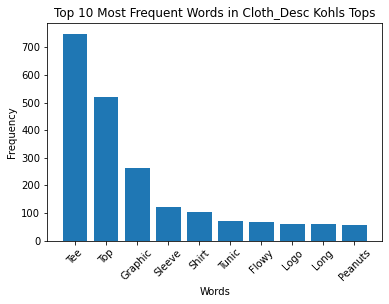

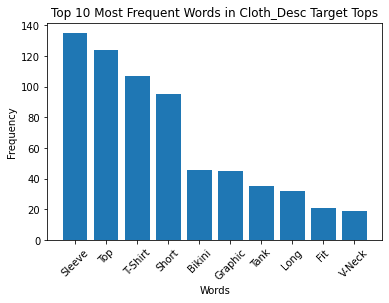

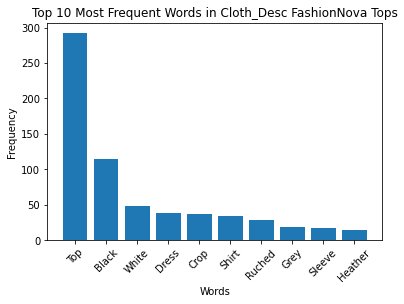

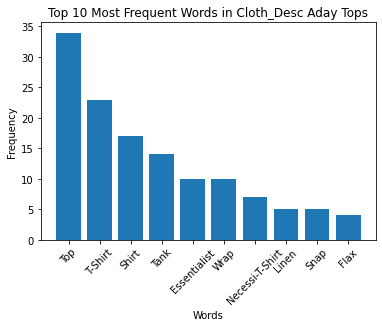

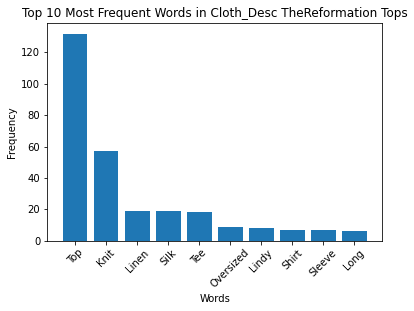

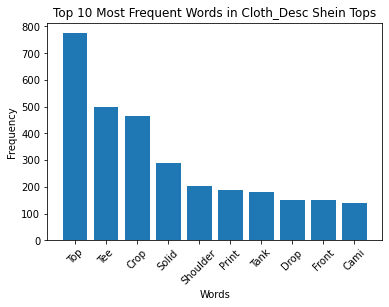

In [300]:
plot_top_words(tops_khols_word_count, 'Kohls Tops')
plot_top_words(tops_target_word_count, 'Target Tops')
plot_top_words(tops_fashionnova_word_count, 'FashionNova Tops')
plot_top_words(tops_aday_word_count, 'Aday Tops')
plot_top_words(tops_thereformation_word_count, 'TheReformation Tops')
plot_top_words(tops_shein_word_count, 'Shein Tops')

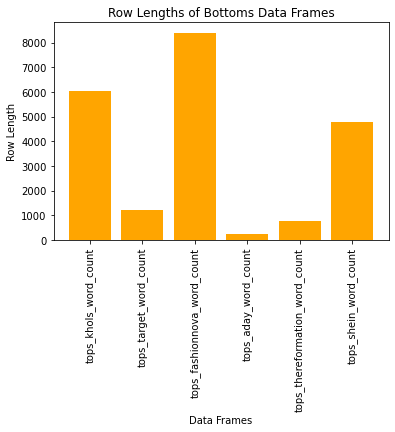

In [301]:
dfs = ['tops_khols_word_count', 'tops_target_word_count', 'tops_fashionnova_word_count', \
       'tops_aday_word_count', 'tops_thereformation_word_count', 'tops_shein_word_count']
row_lengths = [len(df_fashionnova), len(df_target), len(df_kohls), len(df_aday), len(df_thereformation), len(df_shein)]

plt.bar(dfs, row_lengths, color='orange')
plt.title('Row Lengths of Bottoms Data Frames')
plt.xlabel('Data Frames')
plt.ylabel('Row Length')

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.show()


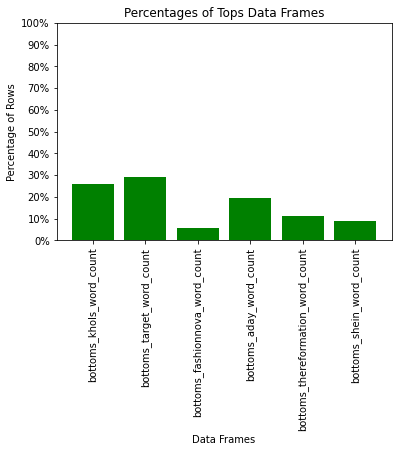

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataframes row lengths
df_lengths = [len(df_fashionnova), len(df_target), len(df_kohls), len(df_aday), len(df_thereformation), len(df_shein)]

# Bottoms dataframes row lengths
bottoms_lengths = [len(tops_khols_word_count), len(tops_target_word_count), len(tops_fashionnova_word_count), \
                   len(tops_aday_word_count), len(tops_thereformation_word_count), len(tops_shein_word_count)]

# Calculate percentages
percentages = np.round(np.array(bottoms_lengths) / np.array(df_lengths) * 100, 2)

# Plot the percentages
plt.bar(dfs, percentages, color='green')
plt.title('Percentages of Tops Data Frames')
plt.xlabel('Data Frames')
plt.ylabel('Percentage of Rows')

# Set y-axis tick marks to display percentages
plt.yticks(np.arange(0, 101, 10))
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{int(x)}%')

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.show()

In [46]:
'''
Target has the highest frequency of bottoms in comparison while fashion nova has a lot less in comparsion.
'''

'\nTarget has the highest frequency of bottoms in comparison while fashion nova has a lot less in comparsion.\n'

In [308]:
def filter_cloth_desc_dress(df):
    # Filter the "Cloth_Desc" column to only include rows with "Jeans" or "Pants"
    filtered = df[df['Cloth_Desc'].str.contains('Dress')]
    
    # Create a new dataframe with just the filtered rows
    company_dress = pd.DataFrame(filtered)
    
    return company_dress

In [309]:
kohls_dress = filter_cloth_desc_dress(df_kohls)
target_dress = filter_cloth_desc_dress(df_target)
fashionnova_dress = filter_cloth_desc_dress(df_fashionnova)
aday_dress = filter_cloth_desc_dress(df_aday)
thereformation_dress = filter_cloth_desc_dress(df_thereformation)
shein_dress = filter_cloth_desc_dress(df_shein)

In [310]:
dress_khols_word_count = count_cloth_words(kohls_dress)
dress_target_word_count = count_cloth_words(target_dress)
dress_fashionnova_word_count = count_cloth_words(fashionnova_dress)
dress_aday_word_count = count_cloth_words(aday_dress)
dress_thereformation_word_count = count_cloth_words(thereformation_dress)
dress_shein_word_count = count_cloth_words(shein_dress)

In [311]:
print(dress_shein_word_count)

Counter({'Dress': 1385, 'SHEIN': 520, 'Print': 392, 'Hem': 374, 'Sleeve': 277, 'Neck': 272, 'Floral': 271, 'Cami': 257, 'Ruffle': 244, 'Bodycon': 240, 'Tie': 180, 'Split': 166, 'Ruched': 160, 'Solid': 159, 'Backless': 139, 'SXY': 135, 'Trim': 135, 'Front': 134, 'Thigh': 132, 'Shoulder': 123, 'EMERY': 120, 'ROSE': 120, 'Belted': 119, 'Allover': 108, 'Out': 105, 'Back': 105, 'VCAY': 105, 'Cut': 103, 'Halter': 85, 'Ditsy': 81, 'Shirred': 77, 'Wrap': 74, 'Lantern': 69, 'Knot': 66, 'Flounce': 62, 'Lace': 55, 'Mesh': 55, 'Satin': 54, 'Tube': 52, 'Side': 51, 'BAE': 51, 'Dot': 51, 'Puff': 49, 'Twist': 48, 'Smock': 48, 'Unity': 47, 'A-line': 45, 'One': 45, 'Striped': 43, 'Button': 42, 'Without': 40, 'Mock': 39, 'Tropical': 38, 'Slit': 37, 'Detail': 36, 'Up': 35, 'Butterfly': 35, 'Plunging': 35, 'Frill': 35, 'Tunic': 34, 'PETITE': 33, 'Waist': 32, 'Tank': 32, 'Asymmetrical': 31, 'Cutout': 31, 'Square': 30, 'Pleated': 30, 'Crisscross': 29, 'Notched': 29, 'Off': 29, 'Bust': 28, 'Polka': 28, 'Sequi

In [323]:
del dress_khols_word_count["Juniors"]
del dress_khols_word_count["Women's"]
del dress_khols_word_count['Size']
del dress_khols_word_count['Plus']
del dress_khols_word_count["Lands'"]
del dress_khols_word_count["Juniors'"]
del dress_khols_word_count["Lands'"]
del dress_khols_word_count['End']
del dress_khols_word_count['Croft']
del dress_khols_word_count['...']
del dress_khols_word_count['Barrow®']
del dress_khols_word_count['Petite']
del dress_khols_word_count['Top']
del dress_khols_word_count['Nina']
del dress_khols_word_count['&']
del dress_khols_word_count['Sleeve']
del dress_khols_word_count['Leonard']
del dress_khols_word_count['London']
del dress_khols_word_count['Times']
del dress_khols_word_count['ALEXIA']
del dress_khols_word_count['ADMOR']
del dress_khols_word_count['Dress']

In [324]:
del dress_fashionnova_word_count["-"]
del dress_fashionnova_word_count['The']
del dress_fashionnova_word_count['Me']
del dress_fashionnova_word_count['Dress']
del dress_fashionnova_word_count['You']

In [325]:
del dress_target_word_count["-"]
del dress_target_word_count["A"]
del dress_target_word_count["&"]
del dress_target_word_count["Dress"]

In [326]:
del dress_thereformation_word_count["Dress"]
del dress_shein_word_count["Dress"]
del dress_shein_word_count["SHEIN"]
del dress_aday_word_count["Dress"]

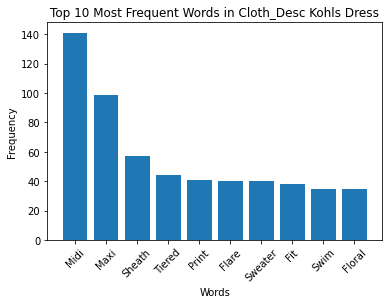

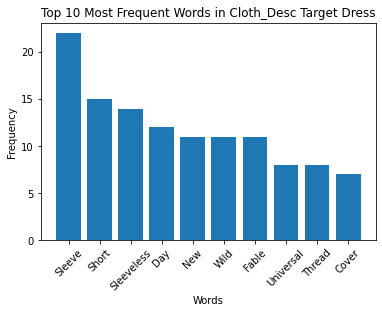

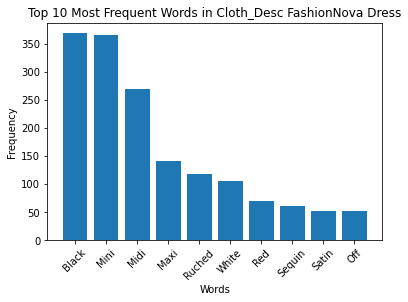

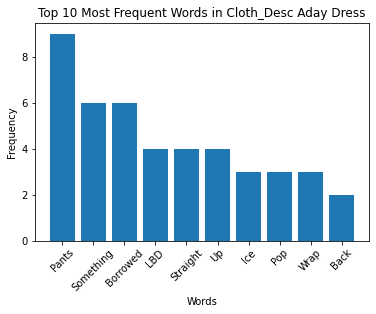

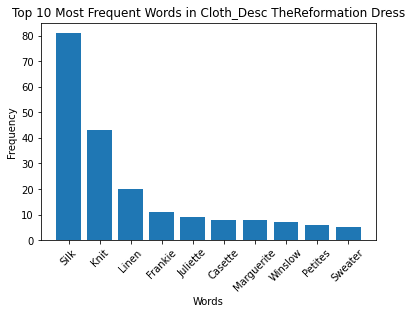

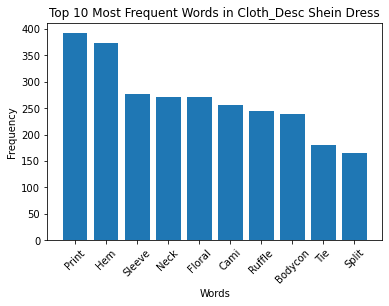

In [327]:
plot_top_words(dress_khols_word_count, 'Kohls Dress')
plot_top_words(dress_target_word_count, 'Target Dress')
plot_top_words(dress_fashionnova_word_count, 'FashionNova Dress')
plot_top_words(dress_aday_word_count, 'Aday Dress')
plot_top_words(dress_thereformation_word_count, 'TheReformation Dress')
plot_top_words(dress_shein_word_count, 'Shein Dress')

In [ ]:
'''
I did not include this on the website because it felt clunky. There was already something similar on Tableau and the 
analysis page was getting huge!
'''

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [155]:
def analyze_cloth_desc_LR(df, keyword):
    '''This function takes a dataframe and a keyword as input and analyzes the Cloth_Desc column of the dataframe to predict
    the price of the clothing item. The Cloth_Desc column is preprocessed using CountVectorizer to convert the text data 
    into numerical data. The function then combines the text data with a binary feature indicating whether the Cloth_Desc 
    contains the keyword.The data is split into training and testing sets and a linear regression model with L1 
    regularization is trained using the training data. The performance of the model is evaluated using cross-validation 
    and the root mean squared error (RMSE) is calculated. The function then filters the dataframe to only include rows where
    Cloth_Desc contains the keyword and calculates the average price and price range of those items. Function prints the 
    RMSE, average price, and price range and returns a dataframe containing these metrics.
    '''
    # Preprocess the Cloth_Desc column using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    X_text = vectorizer.fit_transform(df['Cloth_Desc'])
    X_keyword = np.array(df['Cloth_Desc'].str.contains(keyword, case=False), dtype=int)
    X = np.hstack((X_text.toarray(), X_keyword.reshape(-1, 1)))
    y = df['Price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model with L1 regularization
    model = LassoCV(cv=5, max_iter=100)
    model.fit(X_train, y_train)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -np.mean(scores)
    print('RMSE: ', rmse)

    # Filter the dataframe to only include rows where Cloth_Desc contains the keyword
    keyword_df = df[df['Cloth_Desc'].str.contains(keyword, case=False)]

    # Calculate the average price and range of price
    avg_price = keyword_df['Price'].mean()
    price_range = np.ptp(keyword_df['Price'])

    # Print the results
    print('Average price for {}: ${:.2f}'.format(keyword, avg_price))
    print('Price range for {}: ${:.2f}'.format(keyword, price_range))
    return pd.DataFrame({'RMSE': [rmse], 'Average Price': [avg_price], 'Price Range': [price_range]})


In [129]:
from sklearn.ensemble import RandomForestRegressor

def analyze_cloth_desc_RF(df, keyword):
    '''
    This function takes in a pandas DataFrame df and a keyword keyword. The function preprocesses the Cloth_Desc column of 
    the DataFrame using CountVectorizer, and adds a binary feature indicating whether or not the keyword is present in each
    row of the Cloth_Desc column. The resulting matrix of features is split into training and testing sets, and a Random 
    Forest regression model is trained on the training set. The function then uses the trained model to make predictions on 
    the test set, and evaluates the performance of the model using the root mean squared error (RMSE) metric. The function
    also filters the DataFrame to only include rows where Cloth_Desc contains the keyword, and calculates the average price 
    and range of price for these rows. Finally, the function prints the RMSE, average price, and price range, and returns a
    DataFrame containing these results.'''
    # Preprocess the Cloth_Desc column using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X_text = vectorizer.fit_transform(df['Cloth_Desc'])
    X_keyword = np.array(df['Cloth_Desc'].str.contains(keyword, case=False), dtype=int)
    X = np.hstack((X_text.toarray(), X_keyword.reshape(-1, 1)))
    y = df['Price']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('RMSE: ', rmse)
    
    # Filter the dataframe to only include rows where Cloth_Desc contains the keyword
    keyword_df = df[df['Cloth_Desc'].str.contains(keyword, case=False)]

    # Calculate the average price and range of price
    avg_price = keyword_df['Price'].mean()
    price_range = np.ptp(keyword_df['Price'])

    # Print the results
    print('Average price for {}: ${:.2f}'.format(keyword, avg_price))
    print('Price range for {}: ${:.2f}'.format(keyword, price_range))
    return pd.DataFrame({'RMSE': [rmse], 'Average Price': [avg_price], 'Price Range': [price_range]})


In [126]:
from sklearn.ensemble import GradientBoostingRegressor


def analyze_cloth_desc_GB(df, keyword):
    '''
    The analyze_cloth_desc_GB function takes in a pandas DataFrame df and a string keyword as inputs, preprocesses the 
    Cloth_Desc column using CountVectorizer, fits a Gradient Boosting regression model on the preprocessed data, and 
    evaluates the performance of the model. The function then filters the dataframe to only include rows where Cloth_Desc 
    contains the keyword, calculates the average price and price range of the filtered data, and prints the results.
    '''
    # Preprocess the Cloth_Desc column using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X_text = vectorizer.fit_transform(df['Cloth_Desc'])
    X_keyword = np.array(df['Cloth_Desc'].str.contains(keyword, case=False), dtype=int)
    X = np.hstack((X_text.toarray(), X_keyword.reshape(-1, 1)))
    y = df['Price']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Gradient Boosting regression model
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('RMSE: ', rmse)
    
    # Filter the dataframe to only include rows where Cloth_Desc contains the keyword
    keyword_df = df[df['Cloth_Desc'].str.contains(keyword, case=False)]

    # Calculate the average price and range of price
    avg_price = keyword_df['Price'].mean()
    price_range = np.ptp(keyword_df['Price'])

    # Print the results
    print('Average price for {}: ${:.2f}'.format(keyword, avg_price))
    print('Price range for {}: ${:.2f}'.format(keyword, price_range))
    return pd.DataFrame({'RMSE': [rmse], 'Average Price': [avg_price], 'Price Range': [price_range]})




In [175]:
def model_comparison_bar_graph(lr_results_df, gb_results_df, rf_results_df, company_name, item):
    # Extract RMSE from each results dataframe
    lr_rmse = lr_results_df['RMSE'][0]
    gb_rmse = gb_results_df['RMSE'][0]
    rf_rmse = rf_results_df['RMSE'][0]

    # Create bar graph
    labels = ['Linear Regression', 'Gradient Boosting', 'Random Forest']
    rmse_values = [lr_rmse, gb_rmse, rf_rmse]

    # Set bar colors
    colors = ['powderblue', 'salmon', 'gold']

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(labels, rmse_values, color=colors)
    ax.set_title('RMSE', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('RMSE', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    # Add RMSE value on top of each bar
    for i, v in enumerate(rmse_values):
        ax.text(i, v + 0.01, str(round(v, 2)), color='black', ha='center', fontweight='bold', fontsize=12)

    fig.suptitle(f'{company_name} Model Comparison for {item}', fontsize=16, fontweight='bold')

    plt.show()


In [174]:
LR_Aday_dress_df = analyze_cloth_desc_LR(df_aday, 'dress')
LR_Aday_top_df = analyze_cloth_desc_LR(df_aday, 'top')
'''
The model to predict prices for Aday dresses has an average error of about $30.69, meaning that the predicted prices are 
expected to be within this range of the actual prices. This indicates that the model's predictions may be off by a maximum 
of $30.69 in either direction. The price range for dresses in the dataset is $140.00, which is less than the maximum error 
of the model's predictions. Therefore, the model may not be accurate enough to make meaningful predictions for the entire 
range of prices in the dataset. However, it can still be useful for predicting prices within a certain range, such as for 
dresses priced between $140.00 and $235.00 (the range for dresses in the dataset). 
'''

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001.826927515696, tolerance: 57.66124493478261
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.8835221433892, tolerance: 45.56679430909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.84562233684733, tolerance: 50.69271530873494
  model = cd_fast.enet_coordinate_descent(


RMSE:  28.008150480609068
Average price for dress: $194.26
Price range for dress: $140.00


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.226502015161486, tolerance: 45.56679430909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.41610028756622, tolerance: 45.56679430909091
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2853.2841474480374, tolerance: 57.66124493478261
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

RMSE:  28.619298128801706
Average price for top: $113.67
Price range for top: $107.00


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188.2359707481473, tolerance: 44.155829405120485
  model = cd_fast.enet_coordinate_descent(


"\nThe model to predict prices for Aday dresses has an average error of about $30.69, meaning that the predicted prices are \nexpected to be within this range of the actual prices. This indicates that the model's predictions may be off by a maximum \nof $30.69 in either direction. The price range for dresses in the dataset is $140.00, which is less than the maximum error \nof the model's predictions. Therefore, the model may not be accurate enough to make meaningful predictions for the entire \nrange of prices in the dataset. However, it can still be useful for predicting prices within a certain range, such as for \ndresses priced between $140.00 and $235.00 (the range for dresses in the dataset). \n"

In [131]:
RF_Aday_dress_df = analyze_cloth_desc_RF(df_aday, 'dress')
RF_Aday_top_df = analyze_cloth_desc_RF(df_aday, 'top')
'''
The current model for predicting dress prices has an RMSE of 26.51, which means that the predicted prices may be off by 
as much as $26.51 in either direction. The average price for dresses is $194.26, and the price range is $140.00, which 
is less than the maximum error of the model's predictions. While this indicates that the model may not be accurate enough 
to make precise predictions for the entire range of dress prices in the dataset, it could still be useful for predicting 
prices within a certain range. '''

RMSE:  26.550980839432672
Average price for dress: $194.26
Price range for dress: $140.00
RMSE:  24.96399183875613
Average price for top: $113.67
Price range for top: $107.00


"\nThe current model for predicting dress prices has an RMSE of 26.51, which means that the predicted prices may be off by \nas much as $26.51 in either direction. The average price for dresses is $194.26, and the price range is $140.00, which \nis less than the maximum error of the model's predictions. While this indicates that the model may not be accurate enough \nto make precise predictions for the entire range of dress prices in the dataset, it could still be useful for predicting \nprices within a certain range. "

In [145]:
GB_Aday_dress_df = analyze_cloth_desc_GB(df_aday, 'dress')
GB_Aday_top_df = analyze_cloth_desc_GB(df_aday, 'top')
'''
Worst model
'''

GB_Aday_dress_df.head()

RMSE:  31.606766762916546
Average price for dress: $194.26
Price range for dress: $140.00
RMSE:  32.20602352363528
Average price for top: $113.67
Price range for top: $107.00


,RMSE,Average Price,Price Range
0,31.606767,194.259259,140.0


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


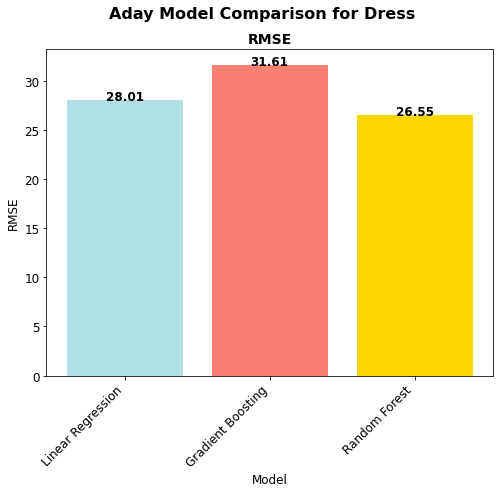

In [176]:
model_comparison_bar_graph(LR_Aday_dress_df, GB_Aday_dress_df, RF_Aday_dress_df, 'Aday', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


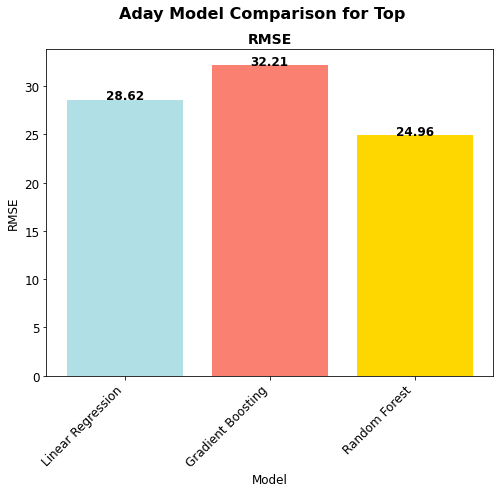

In [177]:
model_comparison_bar_graph(LR_Aday_top_df, GB_Aday_top_df, RF_Aday_top_df, 'Aday', 'Top')

In [156]:
LR_SHEIN_dress_df = analyze_cloth_desc_LR(df_shein, 'dress')
LR_SHEIN_top_df = analyze_cloth_desc_LR(df_shein, 'top')
'''The model's predictions for dress prices are expected to be within +/- $6.88 of the actual prices, on average. 
This means that the model's predictions may be off by a maximum of $6.88 in either direction. The average price for dresses 
in the dataset is $13.92 and the range of prices is $55.25. Compared to the range, the maximum error of the model's 
predictions is quite small, indicating that the model is relatively accurate for predicting dress prices within this 
dataset. '''

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.6665194258385, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1354.8997199053993, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1833.0340626296093, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2952.6046685511683, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3200.6069774371717, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3366.037975308718, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5395.398508016093, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5477.853500985235, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5606.793029637134, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2921.2884688588383, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2054.865230976531, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.003663600014988, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 744.1257956232002, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.0178555568127, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 888.75009252991, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9485.594454227103, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10534.733504873606, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11513.567454485063, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20561.062458957138, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.7439892344555, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1099.6265898331912, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.0184176177281, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3312336086674, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1223.7907549993688, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959.3594925618745, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3194.033607768739, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3737.730443195629, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.07201998778328, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.43436444672989, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.33606524441711, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17623.062396539914, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18245.40810280442, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18779.151154510226, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.98402219720447, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.87639782780025, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315.8648544409225, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6877.561038828957, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7992.6206067460225, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9014.211225845458, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17736.996220150973, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17826.61185228321, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17923.53116241603, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2013.3727857143604, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2339.708851162104, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2600.41397268133, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2600.5187666636484, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2427.441644906379, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2245.8859786396206, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4921.380680288959, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4908.292695990378, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4855.1068288101815, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1908.7245888662583, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952.756316956853, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1994.5038204226585, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4618.3096644070465, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4559.093334900404, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4524.660611475847, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2692.867218188061, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849.643567936553, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4944.55463296239, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15292.175864136821, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15397.02860884348, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15515.46245654378, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5116.599860225062, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5465.2262019802365, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5812.56524751609, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.633486998573062, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.328445170336636, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.57614014993305, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6712.941176737528, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2548.705256362191, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474.3545186798583, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.50297065312043, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.24818001928361, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.75088224984938, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.27886802016292, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.64246533426922, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.544237255235203, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1168.5882983554911, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 845.2579046168175, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639.7231121918085, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746.0587210902522, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337.26711724854977, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.93301740194147, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.385920073240413, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.726695023433422, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.916220574596082, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.2090809087822, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1734.9866006660304, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2168.784868735922, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12558.76109471904, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12727.404766254585, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12894.58544727067, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5913.744258376428, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6768.702522642103, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7695.259041445999, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17537.16830904683, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17749.75793588136, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17957.479410894593, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9424.522163435435, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9736.07644420076, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10011.00566898084, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.217939013629803, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.303374983544927, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.774860873498255, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.4639144566827, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.23224230686174, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.18086173669872, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10856.502703243234, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11194.582238569303, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11509.814418161513, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1886.7000778141519, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209.0080993858137, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2374.957374448866, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4612.091535033818, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5250.277486759296, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5728.9556753991565, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1674.9337433382898, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1616.0000370460548, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1461.850959825293, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3138.20711673348, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3447.2083993718406, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3776.388853769582, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3273.7342610552223, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3396.8566683845856, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3487.2266504410363, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.09242243409972, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.2984052335596, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.18642511666985, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.053787952230778, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.997761008402449, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.888950449065305, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12963.869263333596, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13167.608289843425, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13325.195573049183, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

RMSE:  6.532105558147945
Average price for dress: $13.92
Price range for dress: $55.25


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.312027279520407, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.202731758283335, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.202565917221364, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1447.4451652939606, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1486.5333456272492, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1506.320195885186, tolerance: 13.262615477679269
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2350.44690132729, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2326.671197139789, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2280.2917023863993, tolerance: 13.160044956750324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.300875724220532, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.151413692801725, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.53274326326209, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4208.324807219498, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4178.610070504656, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4162.364440812307, tolerance: 12.655348526949155
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.96164640742063, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.14669463520113, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.8803491984727, tolerance: 13.036437288640805
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.2845775410533, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.67908384191105, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.8430942769919, tolerance: 13.397351073520205
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.639693640987389, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.978496850162628, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.187133381492458, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.56872757834935, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 831.1496197408051, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1097.1475944311242, tolerance: 10.70896319097392
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.35831523058, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.7658091495687, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1336.0726253531393, tolerance: 10.366773508235536
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.305624065425945, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.443780810019234, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.12162786888075, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1659.794960416024, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2739.9065146134963, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3404.7235656465855, tolerance: 10.522803456499592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.94003893467016, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.8368275563771, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.1692250372362, tolerance: 10.573797203934827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.64067114434147, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225.86589736037422, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.4649486564449, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037.5905587774541, tolerance: 10.877598396391038
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.877753321270575, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.30350791629462, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.4325786394038, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271.8762578434398, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1440.3313215561939, tolerance: 10.852414004531378
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2056.8048463273735, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2059.933953999207, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2057.041131389262, tolerance: 10.121033808920131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1315.2125980928395, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1586.038690116271, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1701.3502984756124, tolerance: 10.42040526399348
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.98524239391554, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.07476020953618, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.22215079484158, tolerance: 10.470067256961304
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.906047285025124, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.70505041853175, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.047029058579938, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.05667676914891, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.00275011383928, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.25987904472277, tolerance: 10.775671161670061
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.402886784795555, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.29750092742324, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.25974413848598, tolerance: 10.346380581340668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.092383243798395, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.318799852524535, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.21614834423235, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056.114815039371, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1074.3012319612099, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056.8142760802657, tolerance: 9.817018995391198
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.636793220735854, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.79456253180979, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.02214562273002, tolerance: 10.21706032300326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.54335936359712, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.493263255921192, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.817709923663642, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295.9026280011894, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284.5197769016158, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.828817672198, tolerance: 9.966163257002034
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.5880927131293, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.2819351773942, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130.9856820803616, tolerance: 10.270842238639512
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.554002872740966, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.160445198533125, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.26665726934152, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547.2355361499285, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574.5730937399057, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.7879699971891, tolerance: 10.728540389861452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.56205277460685, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.91129436024494, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.17071225675318, tolerance: 10.199427917603911
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.98902171169175, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.513311431146576, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.180819106841227, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116.2087265781302, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075.4169985309563, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990.4281748678113, tolerance: 10.300592371462917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.14582252909895, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.520134252888965, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.042331453172665, tolerance: 10.262338015152748
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.43902191446978, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.21559642822831, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.69937996340741, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249.75871617843222, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.90197799971793, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340.6073437080995, tolerance: 10.652069959494906
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.0425434943245, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634.0603327479766, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.5370668251708, tolerance: 11.089793650110023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.95151119222282, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.09632827868336, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.37673491463647, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.8877284588161, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002.324546374999, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083.2985398357487, tolerance: 10.560775247208637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.2112132900802, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.6286888922623, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.53097814586363, tolerance: 10.660677000863895
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.07720120664453, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169.57028999984323, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.19429326204408, tolerance: 10.613940060024438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.242022629565326, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.702488565380918, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.740419429464964, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.9540719273791, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642.5473778276792, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623.8479488127923, tolerance: 10.661402056032587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

RMSE:  6.525607901263297
Average price for top: $12.80
Price range for top: $41.90


"The model's predictions for dress prices are expected to be within +/- $6.88 of the actual prices, on average. \nThis means that the model's predictions may be off by a maximum of $6.88 in either direction. The average price for dresses \nin the dataset is $13.92 and the range of prices is $55.25. Compared to the range, the maximum error of the model's \npredictions is quite small, indicating that the model is relatively accurate for predicting dress prices within this \ndataset. "

In [158]:
RF_SHEIN_dress_df = analyze_cloth_desc_RF(df_shein, 'dress')
RF_SHEIN_top_df = analyze_cloth_desc_RF(df_shein, 'top')

RMSE:  7.2554528132998355
Average price for dress: $13.92
Price range for dress: $55.25
RMSE:  7.222674005120104
Average price for top: $12.80
Price range for top: $41.90


In [159]:
GB_SHEIN_dress_df = analyze_cloth_desc_GB(df_shein, 'dress')
GB_SHEIN_top_df = analyze_cloth_desc_GB(df_shein, 'top')

RMSE:  6.6056517025608805
Average price for dress: $13.92
Price range for dress: $55.25
RMSE:  6.58880525791874
Average price for top: $12.80
Price range for top: $41.90


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


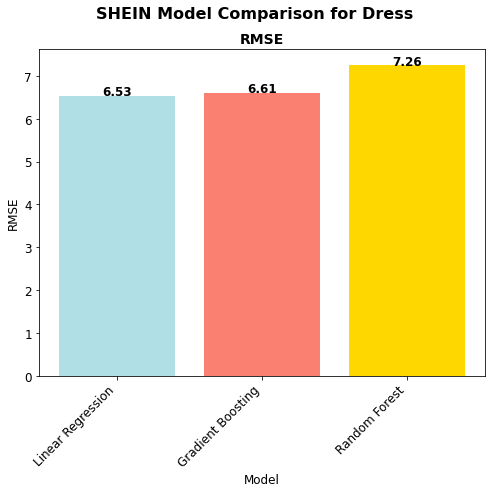

In [178]:
model_comparison_bar_graph(LR_SHEIN_dress_df, GB_SHEIN_dress_df, RF_SHEIN_dress_df, 'SHEIN', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


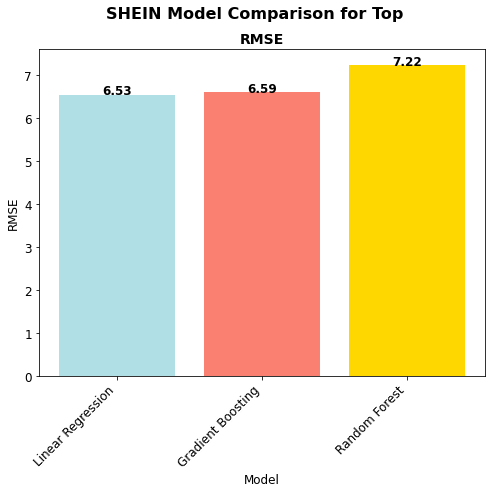

In [179]:
model_comparison_bar_graph(LR_SHEIN_top_df, GB_SHEIN_top_df, RF_SHEIN_top_df, 'SHEIN', 'Top')

In [163]:
LR_TheReformation_dress_df = analyze_cloth_desc_LR(df_thereformation, 'dress')
LR_TheReformation_top_df = analyze_cloth_desc_LR(df_thereformation, 'top')
'''
The model may not be accurate enough to make meaningful predictions for dresses in the higher price range. 
However, the model may still be useful for predicting prices within a certain range, such as for dresses priced between 
the average price and the upper end of the price range.
'''

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24983.85574049977, tolerance: 817.5129826433121
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33227.638388546824, tolerance: 683.2763866533865
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30490.98126403529, tolerance: 608.6742352589642
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

RMSE:  54.47333150374418
Average price for dress: $268.74
Price range for dress: $650.00


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1009.3659623202111, tolerance: 683.2763866533865
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2492.9790332754783, tolerance: 683.2763866533865
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2742.573048231774, tolerance: 683.2763866533865
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3755.825117880013, tolerance: 597.8190251243782
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30448.261505976, tolerance: 683.2763866533865
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601.2243053331767, tolerance: 524.3945773631841
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.99651179809, tolerance: 588.4227260545906
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524.6413422377955, tolerance: 588.4227260545906
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261.77728079597, tolerance: 588.4227260545906
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

RMSE:  54.312270818253054
Average price for top: $107.77
Price range for top: $130.00


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6138.393911011168, tolerance: 705.1465856858847
  model = cd_fast.enet_coordinate_descent(


'\nThe model may not be accurate enough to make meaningful predictions for dresses in the higher price range. \nHowever, the model may still be useful for predicting prices within a certain range, such as for dresses priced between \nthe average price and the upper end of the price range.\n'

In [164]:
GB_TheReformation_dress_df = analyze_cloth_desc_GB(df_thereformation, 'dress')
GB_TheReformation_top_df = analyze_cloth_desc_GB(df_thereformation, 'top')

RMSE:  43.33464900042894
Average price for dress: $268.74
Price range for dress: $650.00
RMSE:  42.23671730568528
Average price for top: $107.77
Price range for top: $130.00


In [165]:
RF_TheReformation_dress_df = analyze_cloth_desc_RF(df_thereformation, 'dress')
RF_TheReformation_top_df = analyze_cloth_desc_RF(df_thereformation, 'top')

RMSE:  35.709878353868724
Average price for dress: $268.74
Price range for dress: $650.00
RMSE:  35.12534496368011
Average price for top: $107.77
Price range for top: $130.00


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


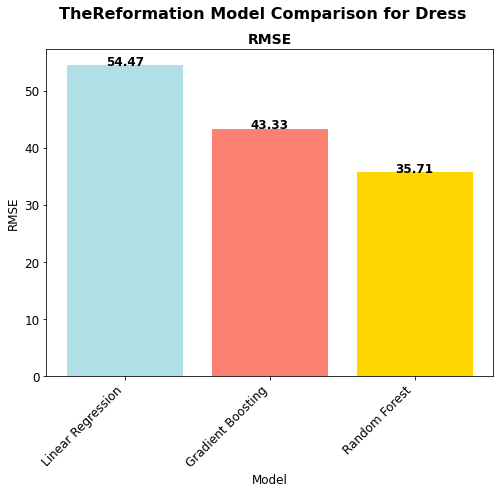

In [180]:
model_comparison_bar_graph(LR_TheReformation_dress_df, GB_TheReformation_dress_df, RF_TheReformation_dress_df, 'TheReformation', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


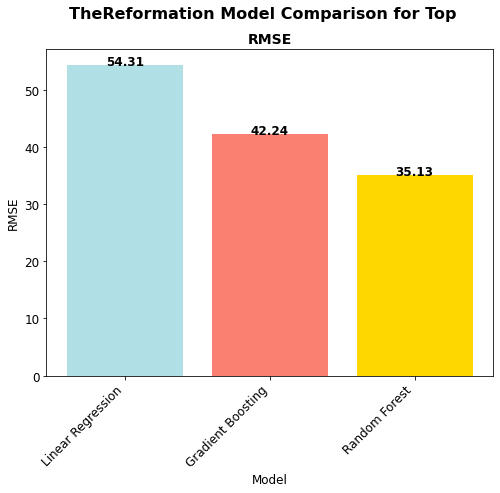

In [295]:
model_comparison_bar_graph(LR_TheReformation_top_df, GB_TheReformation_top_df, RF_TheReformation_top_df, 'TheReformation', 'Top')

In [168]:
LR_FashionNova_dress_df = analyze_cloth_desc_LR(df_fashionnova, 'dress')
LR_FashionNova_top_df = analyze_cloth_desc_LR(df_fashionnova, 'top')

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.28871630423237, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.10442132735625, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.73904372385005, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4372.420880585152, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2875.3721494507627, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.0097972896765, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.16402285633376, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.60171833029017, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.10808892385103, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.3008382523549, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.6853051192011, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249.54512635618448, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238.94382136675995, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600.2396261075046, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.187372872897, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11531.053567361698, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11543.973453805229, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11512.265235640749, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1400.9784238516004, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1385.9777536900365, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.9003169800853, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466.8659289678908, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.0971732624457, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.8062447637785, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.77502904745052, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.2340448217583, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.96837537235115, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.5917158233933, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620.603648299817, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633.1437455718406, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.14281331491657, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.9204322222504, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582.1039026061771, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.36380692140665, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311.16085930290865, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1009.7405780768604, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11126.326650184259, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12284.129307064984, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13091.649752890284, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4871.2408518442535, tolerance: 70.83966812469065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4993.581994691223, tolerance: 70.83966812469065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5072.1912805825705, tolerance: 70.83966812469065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16158.10713262047, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16554.34197859827, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16815.617932601075, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.70184641116066, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242.1241540548508, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.546853996173, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14255.288060712279, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14540.310026993946, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14802.731379988545, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15736.717511176015, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17021.85011860181, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18016.330673285032, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922.8626763750217, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2872.362207826285, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3948.5047850913834, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14717.041856259806, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15513.55197509288, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15895.375191717147, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.24018327717204, tolerance: 71.36192903037902
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.0430523858522, tolerance: 71.36192903037902
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.2694990929449, tolerance: 71.36192903037902
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3630.4503941018484, tolerance: 71.47360746110789
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4079.9810467020725, tolerance: 71.47360746110789
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4489.484925786441, tolerance: 71.47360746110789
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1772.747088240052, tolerance: 72.55170401462262
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1757.3100612559938, tolerance: 72.55170401462262
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.6055972227477, tolerance: 72.55170401462262
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.992473034421, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.7258714926429, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.67357379366877, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.9940790681867, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.97154692123877, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257.8585236336803, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converg

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14631.514499980083, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15779.387829931511, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16746.644989542896, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13677.645840986399, tolerance: 72.07454485414185
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14262.39340979053, tolerance: 72.07454485414185
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.4974174189265, tolerance: 70.30660930476685
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.0997244071914, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645.8574415716575, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678.502217140689, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2176.6548430052935, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2187.7266236123396, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2322.188761510537, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(


RMSE:  12.841652247846275
Average price for dress: $24.43
Price range for dress: $119.01


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.67037983477348, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273.2668315565679, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.9806817077915, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1005.7059097356978, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564.7226845234982, tolerance: 88.95890111661052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.12523610203061, tolerance: 89.61413342295413
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.8693512575701, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.32073325151578, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.92805208906066, tolerance: 87.57553094260174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2212.107240629557, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2425.7321843865793, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649.101846291509, tolerance: 89.11043809352165
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672.5741291383747, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701.7006857717643, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702.004696496122, tolerance: 71.5172844380823
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.15829404786928, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.77925530803623, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.56113807635847, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216.7531043028575, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1170.5838741739863, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.46907200414, tolerance: 71.94295085201166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627.2973848344409, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636.9670909636188, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.77064042078564, tolerance: 70.8362934729446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.62715479370672, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.91834711859701, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996.1630162611837, tolerance: 70.17440209555556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1784.3642714779126, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.5720052789547, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2170.4187517353566, tolerance: 71.34880029490932
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454.7460765474825, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.0904422305757, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.9511182161514, tolerance: 71.89047134647879
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557.4295179194305, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538.3380306313629, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.54139208979905, tolerance: 72.23137914890836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.50577283190796, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.3536305438611, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2045.0481792338542, tolerance: 71.45487146222221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.99549517658306, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.84576412342722, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.0542980679893, tolerance: 72.02203968765542
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.83284203492803, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.9902786728344, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.243315200496, tolerance: 69.81486882641401
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1591.1494122591102, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1646.6554656014778, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1635.9145827722969, tolerance: 69.94727659446065
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1560.091872135119, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1560.7217073889915, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1508.1471009894158, tolerance: 71.72593999376096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615.2793270135298, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1541.6758365564165, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460.3075650762185, tolerance: 68.80094464466474
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2191.0117798252613, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2089.430196469999, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.8480313910404, tolerance: 69.97924136435233
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336.5044637094252, tolerance: 71.36192903037902
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2843.9165894571343, tolerance: 71.36192903037902
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.64409229753073, tolerance: 71.47360746110789
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5319.067621683964, tolerance: 71.47360746110789
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.28984168020543, tolerance: 72.55170401462262
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124.78357970854267, tolerance: 72.55170401462262
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.57821589999367, tolerance: 69.50869237079364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.77737129037268, tolerance: 69.50869237079364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.3660654257401, tolerance: 69.50869237079364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132.810772369674, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1817.0657097034855, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1913.8470208043582, tolerance: 71.51649149883096
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.4359614822897, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.30740245163906, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933.772917676717, tolerance: 70.850800551318
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converge

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2685.150154250441, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2621.786660832935, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3040.8498781739036, tolerance: 71.00063836611398
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1947.3906957220752, tolerance: 70.30660930476685
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2273.874395540566, tolerance: 70.30660930476685
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2368.821859541291, tolerance: 70.30660930476685
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2189.075590378954, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2083.9123263786314, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138.476461840037, tolerance: 70.22743338497409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

RMSE:  12.839611594091792
Average price for top: $13.33
Price range for top: $48.01


In [169]:
GB_FashionNova_dress_df = analyze_cloth_desc_GB(df_fashionnova, 'dress')
GB_FashionNova_top_df = analyze_cloth_desc_GB(df_fashionnova, 'top')

RMSE:  13.513872931344
Average price for dress: $24.43
Price range for dress: $119.01
RMSE:  13.501151102636118
Average price for top: $13.33
Price range for top: $48.01


In [170]:
RF_FashionNova_dress_df = analyze_cloth_desc_RF(df_fashionnova, 'dress')
RF_FashionNova_top_df = analyze_cloth_desc_RF(df_fashionnova, 'top')

RMSE:  13.373307633837147
Average price for dress: $24.43
Price range for dress: $119.01
RMSE:  13.3700393878607
Average price for top: $13.33
Price range for top: $48.01


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


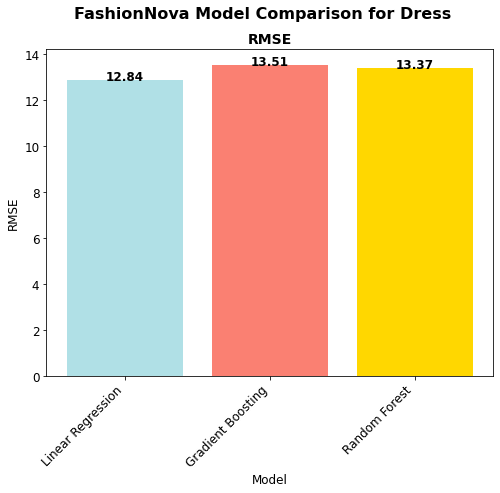

In [182]:
model_comparison_bar_graph(LR_FashionNova_dress_df, GB_FashionNova_dress_df, RF_FashionNova_dress_df, 'FashionNova', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


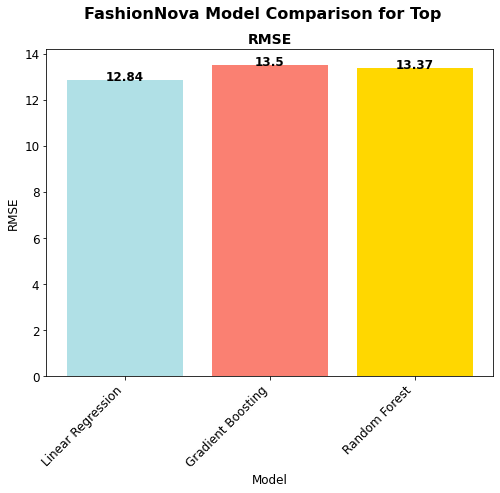

In [183]:
model_comparison_bar_graph(LR_FashionNova_top_df, GB_FashionNova_top_df, RF_FashionNova_top_df, 'FashionNova', 'Top')

In [187]:
null_rows = df_kohls[df_kohls.isnull().any(axis=1)]
print(null_rows)
df_kohls_no_nullPrice = df_kohls.dropna(subset=['Price'])

      Unnamed: 0                                       Cloth_Desc  Price
372          372      Women's Nike Dri-FIT Attack Training Shorts    NaN
581          581  Plus Size Nike Dri-FIT Training Swoosh Logo Tee    NaN
692          692                         Women's Nike Dri-FIT Tee    NaN
752          752    Plus Size Nike Dri-FIT Attack Training Shorts    NaN
1438        1438          Women's Nike Dri-FIT Swoosh Graphic Tee    NaN
1522        1522              Women's Nike Dri-FIT Racerback Tank    NaN
2252        2252      Women's Nike Sportswear Essentials Logo Tee    NaN
2337        2337                    Women's Nike Dry Training Tee    NaN
3166        3166                        Women's Nike Dri-FIT Tank    NaN
4178        4178       Women's Nike Sportswear Essential Crop Tee    NaN
4274        4274      Women's Nike Sportswear Club Essentials Tee    NaN
4275        4275               Plus Size Nike Sportswear Club Tee    NaN


In [188]:
LR_Kohls_dress_df = analyze_cloth_desc_LR(df_kohls_no_nullPrice, 'dress')
LR_Kohls_top_df = analyze_cloth_desc_LR(df_kohls_no_nullPrice, 'Top')

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2274.366567540914, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2995.135526394006, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4055.3065544427373, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2479.316736751003, tolerance: 507.0606507066729
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8682.453029936878, tolerance: 507.0606507066729
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11123.105541116907, tolerance: 507.0606507066729
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52092.54780874832, tolerance: 607.9934047905099
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.5052420239663, tolerance: 390.77298284680023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687.0822779597947, tolerance: 390.77298284680023
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7112.299458860769, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7212.014039198868, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7188.013137640199, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2432.202011877671, tolerance: 374.5826386336984
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.72274515382, tolerance: 374.5826386336984
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3781.4538505570963, tolerance: 383.54120770345526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.9023520392366, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1482.1353856348433, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1440.8213718235493, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.2735771090956, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.4235862125643, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3279.2045564409345, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10632.537009467604, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10874.105881970725, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10729.294292875798, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6207.62129402603, tolerance: 412.1046709878355
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5440.950851234258, tolerance: 412.1046709878355
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6404.912691815174, tolerance: 412.1046709878355
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.2837162464857, tolerance: 350.2583168523649
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700.4497279095231, tolerance: 350.2583168523649
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633.0372818605974, tolerance: 350.2583168523649
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7841.927159659215, tolerance: 399.40040152776095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7562.690407953691, tolerance: 399.40040152776095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7264.806859223172, tolerance: 399.40040152776095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603.5906724024098, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.9828195417067, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.4084394094534, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8698.717527955305, tolerance: 377.40283880015613
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8567.833140934701, tolerance: 377.40283880015613
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8266.605519682169, tolerance: 377.40283880015613
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

RMSE:  15.46096594613044
Average price for dress: $54.94
Price range for dress: $151.00


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.3825550628826, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2192.2540733960923, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3057.310206650407, tolerance: 477.0120396275541
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13694.164743070258, tolerance: 501.62062461756574
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13803.009678243427, tolerance: 501.62062461756574
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14067.835043567931, tolerance: 501.62062461756574
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9768.384793205885, tolerance: 494.54025724686676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9511.755577477394, tolerance: 494.54025724686676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9134.611767385155, tolerance: 494.54025724686676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7437.852798772277, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7350.264890638879, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7423.627541724709, tolerance: 395.30335467659756
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853.9780785776675, tolerance: 374.5826386336984
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4825.750802133232, tolerance: 374.5826386336984
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840.3264590862673, tolerance: 383.54120770345526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175.1806119922549, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1296.3027708040318, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403.9248862699606, tolerance: 404.17344424123024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805.6513578873128, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2976.641012612963, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4264.738383397227, tolerance: 406.65697554404477
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721.0791162161622, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.6506305872463, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832.8545080365147, tolerance: 405.61010898595526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8117.275252625113, tolerance: 392.45130044817336
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8176.181264200248, tolerance: 392.45130044817336
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.3962351260707, tolerance: 406.1142250294222
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849.428014863166, tolerance: 356.53987027249764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837.9114732982125, tolerance: 356.53987027249764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.9327007399406, tolerance: 356.53987027249764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.1112291626632, tolerance: 375.4109463486859
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499.33936902624555, tolerance: 375.4109463486859
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.6727132105734, tolerance: 375.4109463486859
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6396.7009253861615, tolerance: 393.11345276734386
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7905.412214787444, tolerance: 393.11345276734386
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8496.011172641534, tolerance: 393.11345276734386
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8416.977333740331, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8379.892439779127, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8319.92191190389, tolerance: 410.6613306427866
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663.8051935674157, tolerance: 397.55106207748366
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3559.2920851266244, tolerance: 397.55106207748366
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9656.906715648249, tolerance: 397.55106207748366
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

RMSE:  15.456624665228233
Average price for Top: $39.99
Price range for Top: $133.01


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50464.676978341304, tolerance: 494.54025724686676
  model = cd_fast.enet_coordinate_descent(


In [189]:
GB_Kohls_dress_df = analyze_cloth_desc_GB(df_kohls_no_nullPrice, 'dress')
GB_Kohls_top_df = analyze_cloth_desc_GB(df_kohls_no_nullPrice, 'Top')

RMSE:  16.169334261968523
Average price for dress: $54.94
Price range for dress: $151.00
RMSE:  16.201665462859676
Average price for Top: $39.99
Price range for Top: $133.01


In [191]:
RF_Kohls_dress_df = analyze_cloth_desc_RF(df_kohls_no_nullPrice, 'dress')
RF_Kohls_top_df = analyze_cloth_desc_RF(df_kohls_no_nullPrice, 'Top')

RMSE:  11.31015472817326
Average price for dress: $54.94
Price range for dress: $151.00
RMSE:  11.27732684606715
Average price for Top: $39.99
Price range for Top: $133.01


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


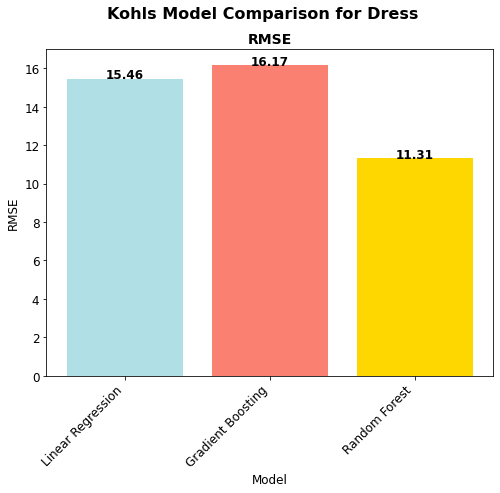

In [192]:
model_comparison_bar_graph(LR_Kohls_dress_df, GB_Kohls_dress_df, RF_Kohls_dress_df, 'Kohls', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


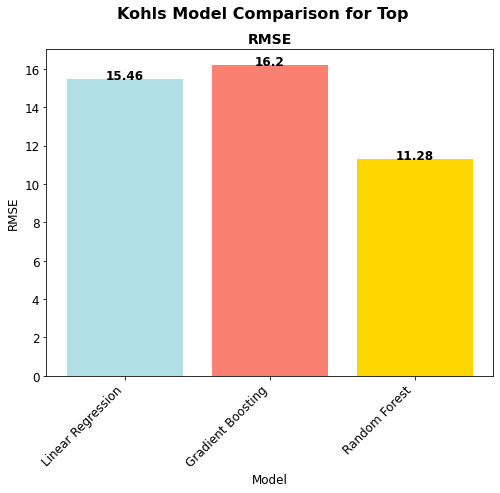

In [193]:
model_comparison_bar_graph(LR_Kohls_top_df, GB_Kohls_top_df, RF_Kohls_top_df, 'Kohls', 'Top')

In [267]:
LR_target_dress_df = analyze_cloth_desc_LR(df_target, 'dress')
LR_target_top_df = analyze_cloth_desc_LR(df_target, 'Top')

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.339222724447609, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.873546496688505, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.8636183106928, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.87328796347265, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.90237650934705, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.08087844765987, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.6242778811029, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.028907696640545, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.6260248382996, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.977281877673931, tolerance: 5.606732356440129
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.831359007127503, tolerance: 5.684197273090615
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.253971807371272, tolerance: 5.684197273090615
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.50071141575336, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.799082125226505, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.220999761078474, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.650438868618039, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.47076192767372, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.512260071021956, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.91858404347249, tolerance: 5.646125086148868
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.971337365030195, tolerance: 5.646125086148868
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.63301958640932, tolerance: 5.646125086148868
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.96028190553739, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.14093413671549, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.44370086049321, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.88342081011524, tolerance: 5.6790666956381255
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.438339189791577, tolerance: 5.6790666956381255
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.962731993106445, tolerance: 5.6790666956381255
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.348292975068944, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.4164126642363, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.17435309088364, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.93795245784804, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.64197638759788, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.883699088279172, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.355302222698356, tolerance: 5.603921852471729
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.47222830707824, tolerance: 5.603921852471729
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.54694194435433, tolerance: 5.603921852471729
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.23988570173833, tolerance: 5.740503229369953
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.295197886374808, tolerance: 5.740503229369953
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.789699238716821, tolerance: 5.740503229369953
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.50375409898811, tolerance: 6.016823591696285
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.2934446120139, tolerance: 5.889663644200324
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.444511037238954, tolerance: 5.889663644200324
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.259552670863286, tolerance: 5.739706549983872
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.501725490256376, tolerance: 5.739706549983872
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.57730106994086, tolerance: 5.739706549983872
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

RMSE:  4.244308936292792
Average price for dress: $29.10
Price range for dress: $41.96


C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.582781014243665, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.640037345845485, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.731162864711223, tolerance: 7.114050827658474
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.483068891579023, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.33042347673836, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.31583553939117, tolerance: 7.156241116033591
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.096830617737396, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.51176369247696, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.43496663134147, tolerance: 7.2963976210335915
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.808705792070896, tolerance: 5.606732356440129
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.005922826711412, tolerance: 5.606732356440129
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.564211607790185, tolerance: 5.606732356440129
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.386650214674773, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.071214979219803, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.05656741773328, tolerance: 5.6375976596768975
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.4891781935057224, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.404574288784715, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.971049898264482, tolerance: 5.512354145631067
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.80589715086808, tolerance: 5.822098719886731
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.120089770622144, tolerance: 5.646125086148868
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.420575985009918, tolerance: 5.646125086148868
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.003679679605966, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.616345601943749, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.214174727281033, tolerance: 5.717081185363489
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.73794041667884, tolerance: 5.877847860710824
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.04232876172864, tolerance: 5.877847860710824
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.03469589234032, tolerance: 5.877847860710824
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.152526899565601, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.355251972146107, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.276565735949589, tolerance: 5.79791550533871
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.820691249242827, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.677143245764455, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.033522703529798, tolerance: 5.725021460193862
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.75517854275881, tolerance: 5.597003820290793
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.852754350701844, tolerance: 5.597003820290793
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.2592257862118, tolerance: 5.597003820290793
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.12671659622083, tolerance: 5.6378686470967745
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.559618775769195, tolerance: 5.740503229369953
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.955055128186359, tolerance: 5.740503229369953
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.07107951338821, tolerance: 5.889663644200324
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.424037653676351, tolerance: 5.792324772180938
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.811942130537773, tolerance: 5.792324772180938
  model = cd_fast.enet_coordinate_descent(
C:\Users\louis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

RMSE:  4.23588690031382
Average price for Top: $18.10
Price range for Top: $31.10


In [278]:
GB_target_dress_df = analyze_cloth_desc_GB(df_target, 'dress')
GB_target_top_df = analyze_cloth_desc_GB(df_target, 'Top')

RMSE:  4.644619035500717
Average price for dress: $29.10
Price range for dress: $41.96
RMSE:  4.765616248944271
Average price for Top: $18.10
Price range for Top: $31.10


In [279]:
RF_target_dress_df = analyze_cloth_desc_RF(df_target, 'dress')
RF_target_top_df = analyze_cloth_desc_RF(df_target, 'Top')

RMSE:  4.136980278853424
Average price for dress: $29.10
Price range for dress: $41.96
RMSE:  4.19912842057047
Average price for Top: $18.10
Price range for Top: $31.10


<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


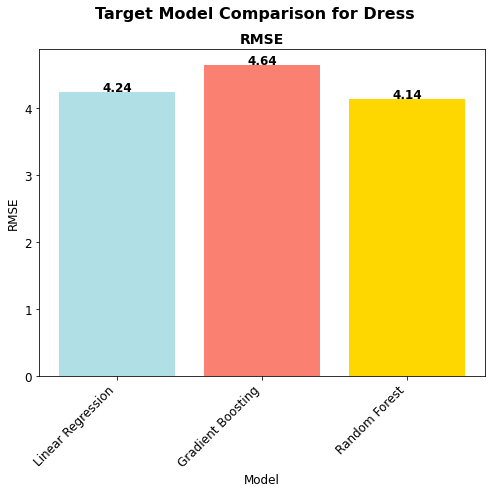

In [280]:
model_comparison_bar_graph(LR_target_dress_df, GB_target_dress_df, RF_target_dress_df, 'Target', 'Dress')

<ipython-input-175-6f4bc5e51f0f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


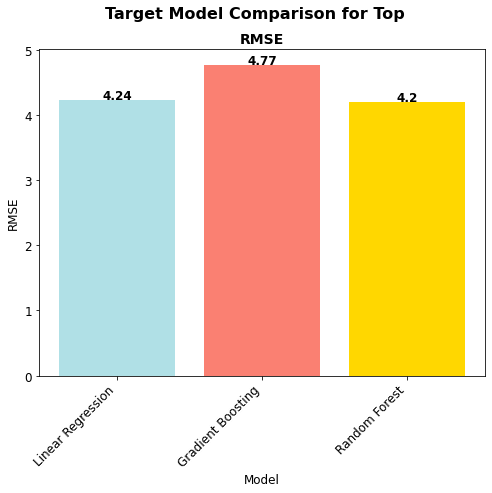

In [281]:
model_comparison_bar_graph(LR_target_top_df, GB_target_top_df, RF_target_top_df, 'Target', 'Top')

In [282]:
import re

def update_dataframe(current_df, add_df, company, item, model):
    add_df["company"] = company
    add_df["item"] = item
    add_df['model'] = model
    updated = current_df.append(add_df, ignore_index=True)
    return updated

In [284]:
current = LR_Kohls_top_df.copy() 
current["company"] = 'Kohls'
current["item"] = 'Top'
current['model'] = 'Linear Regression'
current.head()
curr_new1 = update_dataframe(current, GB_Kohls_top_df, 'Kohls', 'Top', 'Gradient Boost')
curr_new2 = update_dataframe(curr_new1, RF_Kohls_top_df, 'Kohls', 'Top','Random Forest')
curr_new3 = update_dataframe(curr_new2, LR_FashionNova_top_df, 'FashionNova', 'Top', 'Linear Regression')
curr_new4 = update_dataframe(curr_new3, GB_FashionNova_top_df, 'FashionNova', 'Top', 'Gradient Boost')
curr_new5 = update_dataframe(curr_new4, RF_FashionNova_top_df, 'FashionNova', 'Top','Random Forest')
curr_new6 = update_dataframe(curr_new5, LR_TheReformation_top_df, 'TheReformation', 'Top', 'Linear Regression')
curr_new7 = update_dataframe(curr_new6, GB_TheReformation_top_df, 'TheReformation', 'Top', 'Gradient Boost')
curr_new8 = update_dataframe(curr_new7, RF_TheReformation_top_df, 'TheReformation', 'Top', 'Random Forest')
curr_new9 = update_dataframe(curr_new8, LR_SHEIN_top_df, 'SHEIN', 'Top', 'Linear Regression')
curr_new10 = update_dataframe(curr_new9, GB_SHEIN_top_df, 'SHEIN', 'Top', 'Gradient Boost')
curr_new11 = update_dataframe(curr_new10, RF_SHEIN_top_df, 'SHEIN', 'Top','Random Forest')
curr_new12 = update_dataframe(curr_new11, LR_Aday_top_df, 'Aday', 'Top', 'Linear Regression')
curr_new13 = update_dataframe(curr_new12, GB_Aday_top_df, 'Aday', 'Top', 'Gradient Boost')
curr_new14 = update_dataframe(curr_new13, RF_Aday_top_df, 'Aday', 'Top', 'Random Forest')
curr_new15 = update_dataframe(curr_new14, LR_target_top_df, 'Target', 'Top', 'Linear Regression')
curr_new16 = update_dataframe(curr_new15, GB_target_top_df, 'Target', 'Top', 'Gradient Boost')
curr_new17 = update_dataframe(curr_new16, RF_target_top_df, 'Target', 'Top', 'Random Forest')

In [288]:
curr_new17.head(20)

,RMSE,Average Price,Price Range,company,item,model
0,15.456625,39.990945,133.01,Kohls,Top,Linear Regression
1,16.201665,39.990945,133.01,Kohls,Top,Gradient Boost
2,11.277327,39.990945,133.01,Kohls,Top,Random Forest
3,12.839612,13.331311,48.01,FashionNova,Top,Linear Regression
4,13.501151,13.331311,48.01,FashionNova,Top,Gradient Boost
5,13.370039,13.331311,48.01,FashionNova,Top,Random Forest
6,54.312271,107.772727,130.00,TheReformation,Top,Linear Regression
7,42.236717,107.772727,130.00,TheReformation,Top,Gradient Boost
8,35.125345,107.772727,130.00,TheReformation,Top,Random Forest
9,6.525608,12.803652,41.90,SHEIN,Top,Linear Regression


In [291]:
idx = curr_new17.groupby(['company', 'item'])['RMSE'].idxmin()

# select only the rows with the lowest RMSE for each Company and Item
top_model = curr_new17.loc[idx]

top_model.head()

,RMSE,Average Price,Price Range,company,item,model
14,24.963992,113.666667,107.00,Aday,Top,Random Forest
3,12.839612,13.331311,48.01,FashionNova,Top,Linear Regression
2,11.277327,39.990945,133.01,Kohls,Top,Random Forest
9,6.525608,12.803652,41.90,SHEIN,Top,Linear Regression
17,4.199128,18.097222,31.10,Target,Top,Random Forest


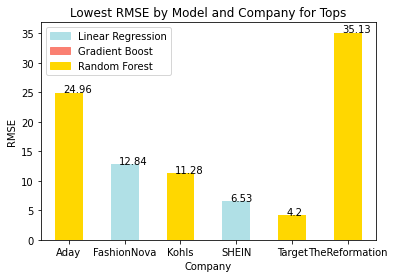

In [292]:
import matplotlib.pyplot as plt

# create a dictionary mapping model names to color codes
colors = {
    'Linear Regression': 'powderblue',
    'Gradient Boost': 'salmon',
    'Random Forest': 'gold'
}

# create a bar graph of the data
top_model.plot.bar(x='company', y='RMSE', color=top_model['model'].map(colors), legend=False)

# add labels and title to the graph
plt.xlabel('Company')
plt.xticks(rotation=0)
plt.ylabel('RMSE')
plt.title('Lowest RMSE by Model and Company for Tops')

# add legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = list(colors.keys())
plt.legend(handles, labels)

for i, v in enumerate(top_model['RMSE']):
    plt.text(i-0.1, v+0.05, str(round(v,2)))
    
    
# display the graph
plt.show()


In [293]:
current = LR_Kohls_dress_df.copy()
current["company"] = 'Kohls'
current["item"] = 'Dress'
current['model'] = 'Linear Regression'
current.head()
curr_new1 = update_dataframe(current, GB_Kohls_dress_df, 'Kohls', 'Dress', 'Gradient Boost')
curr_new2 = update_dataframe(curr_new1, RF_Kohls_dress_df, 'Kohls', 'Dress','Random Forest')
curr_new3 = update_dataframe(curr_new2, LR_FashionNova_dress_df, 'FashionNova', 'Dress', 'Linear Regression')
curr_new4 = update_dataframe(curr_new3, GB_FashionNova_dress_df, 'FashionNova', 'Dress', 'Gradient Boost')
curr_new5 = update_dataframe(curr_new4, RF_FashionNova_dress_df, 'FashionNova', 'Dress','Random Forest')
curr_new6 = update_dataframe(curr_new5, LR_TheReformation_dress_df, 'TheReformation', 'Dress', 'Linear Regression')
curr_new7 = update_dataframe(curr_new6, GB_TheReformation_dress_df, 'TheReformation', 'Dress', 'Gradient Boost')
curr_new8 = update_dataframe(curr_new7, RF_TheReformation_dress_df, 'TheReformation', 'Dress', 'Random Forest')
curr_new9 = update_dataframe(curr_new8, LR_SHEIN_dress_df, 'SHEIN', 'Dress', 'Linear Regression')
curr_new10 = update_dataframe(curr_new9, GB_SHEIN_dress_df, 'SHEIN', 'Dress', 'Gradient Boost')
curr_new11 = update_dataframe(curr_new10, RF_SHEIN_dress_df, 'SHEIN', 'Dress','Random Forest')
curr_new12 = update_dataframe(curr_new11, LR_Aday_dress_df, 'Aday', 'Dress', 'Linear Regression')
curr_new13 = update_dataframe(curr_new12, GB_Aday_dress_df, 'Aday', 'Dress', 'Gradient Boost')
curr_new14 = update_dataframe(curr_new13, RF_Aday_dress_df, 'Aday', 'Dress', 'Random Forest')
curr_new15 = update_dataframe(curr_new14, LR_target_dress_df, 'Target', 'Top', 'Linear Regression')
curr_new16 = update_dataframe(curr_new15, GB_target_dress_df, 'Target', 'Top', 'Gradient Boost')
curr_new17 = update_dataframe(curr_new16, RF_target_dress_df, 'Target', 'Top', 'Random Forest')

idx = curr_new17.groupby(['company', 'item'])['RMSE'].idxmin()

# select only the rows with the lowest RMSE for each Company and Item
top_model = curr_new17.loc[idx]

top_model.head()

,RMSE,Average Price,Price Range,company,item,model
14,26.550981,194.259259,140.00,Aday,Dress,Random Forest
3,12.841652,24.426117,119.01,FashionNova,Dress,Linear Regression
2,11.310155,54.938072,151.00,Kohls,Dress,Random Forest
9,6.532106,13.922916,55.25,SHEIN,Dress,Linear Regression
17,4.136980,29.098654,41.96,Target,Top,Random Forest


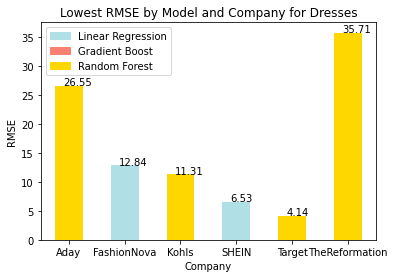

In [294]:
import matplotlib.pyplot as plt

# create a dictionary mapping model names to color codes
colors = {
    'Linear Regression': 'powderblue',
    'Gradient Boost': 'salmon',
    'Random Forest': 'gold'
}

# create a bar graph of the data
colors = {
    'Linear Regression': 'powderblue',
    'Gradient Boost': 'salmon',
    'Random Forest': 'gold'
}

# create a bar graph of the data
ax = top_model.plot.bar(x='company', y='RMSE', color=top_model['model'].map(colors), legend=False)

# add labels and title to the graph
ax.set_xlabel('Company')
ax.set_xticklabels(top_model['company'], rotation=0)
ax.set_ylabel('RMSE')
ax.set_title('Lowest RMSE by Model and Company for Dresses')

# add legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = list(colors.keys())
plt.legend(handles, labels)

# add values to the top of each bar
for i, v in enumerate(top_model['RMSE']):
    plt.text(i-0.1, v+0.05, str(round(v,2)))

# display the graph
plt.show()


In [ ]:
df_target = df_target.sort_values(by='Price', ascending=False)
df_target.head()

In [254]:
#Here a group member requested we have all of our data in 1 frame. So I did that 
def get_price_range(df, n=10):
    # Define a list of words to filter out from the top word count
    filter_words = ["Women's", '...', 'Plus', 'Size', "Juniors'", "Lands'", 'End', 'Petite', 'Alfred', 'Dunner',
                    '&', 'Nina', 'Leonard', 'For', 'Vera', 'Sonoma', '-', '4-10', 'Day', 'Wild', 'Fable', 'A',
                    'New', '6pk', 'All', 'in', 'Auden', 'Xhilaration', 'Universal', 'Thread', 'Motion', 'Hanes',
                    'The', 'Me', 'Up', 'Like', 'Something', 'Borrowed', "SHEIN"]

    # Count the frequency of each cloth word
    word_counts = Counter(' '.join(df['Cloth_Desc']).split())

    # Remove the filter words from the word count
    for word in filter_words:
        if word in word_counts:
            del word_counts[word]

    # Get the top n most frequent cloth words
    top_words = dict(word_counts.most_common(n))

    # Calculate the price range and average price for each top word
    price_stats = {}
    for word in top_words:
        # Filter the dataframe to only include rows where Cloth_Desc contains the word
        word_df = df[df['Cloth_Desc'].str.contains(word, case=False)]

        # Calculate the price range and average price
        price_min = round(word_df['Price'].min(),2)
        price_max = round(word_df['Price'].max(),2)
        price_range = round(word_df['Price'].max() - word_df['Price'].min(), 2)
        avg_price = round(word_df['Price'].mean(), 2)

        # Store the price range and average price for the word
        price_stats[word] = (price_min, price_max, price_range, avg_price)

    return price_stats


In [255]:
khols_filtered_price_range = get_price_range(df_kohls)
target_filtered_price_range = get_price_range(df_target)
fashionnova_filtered_price_range = get_price_range(df_fashionnova)
aday_filtered_price_range = get_price_range(df_aday)
thereformation_filtered_price_range = get_price_range(df_thereformation)
shein_filtered_price_range = get_price_range(df_shein)

In [354]:
print(khols_filtered_price_range)

{'Tee': (7.39, 112.0, 104.61, 23.63), 'Dress': (18.0, 169.0, 151.0, 54.94), 'Top': (6.99, 140.0, 133.01, 39.99), 'Sleeve': (7.39, 168.0, 160.61, 43.52), 'Graphic': (7.8, 60.0, 52.2, 23.84), 'Swim': (20.0, 134.95, 114.95, 54.27), 'Long': (11.29, 258.96, 247.67, 54.97), 'Tank': (6.99, 85.45, 78.46, 32.66), 'Jacket': (24.0, 382.5, 358.5, 88.98), 'Pants': (13.35, 83.96, 70.61, 40.76)}


In [355]:
import pandas as pd

# create dataframe from dictionary
df = pd.DataFrame.from_dict({'Tee': (7.39, 112.0, 104.61, 23.63), 
                             'Dress': (18.0, 169.0, 151.0, 54.94), 
                             'Top': (6.99, 140.0, 133.01, 39.99), 
                             'Sleeve': (7.39, 168.0, 160.61, 43.52), 
                             'Graphic': (7.8, 60.0, 52.2, 23.84), 
                             'Swim': (20.0, 134.95, 114.95, 54.27), 
                             'Long': (11.29, 258.96, 247.67, 54.97), 
                             'Tank': (6.99, 85.45, 78.46, 32.66), 
                             'Jacket': (24.0, 382.5, 358.5, 88.98), 
                             'Pants': (13.35, 83.96, 70.61, 40.76)})

# calculate correlation matrix
corr_matrix = df.corr()

# print correlation matrix
print(corr_matrix)


              Tee     Dress       Top    Sleeve   Graphic      Swim      Long  \
Tee      1.000000  0.995396  0.996686  0.998096  0.985857  0.984669  0.999670   
Dress    0.995396  1.000000  0.998327  0.997639  0.997379  0.996746  0.995549   
Top      0.996686  0.998327  1.000000  0.999749  0.993623  0.991697  0.997916   
Sleeve   0.998096  0.997639  0.999749  1.000000  0.991344  0.989402  0.999094   
Graphic  0.985857  0.997379  0.993623  0.991344  1.000000  0.999723  0.986447   
Swim     0.984669  0.996746  0.991697  0.989402  0.999723  1.000000  0.984714   
Long     0.999670  0.995549  0.997916  0.999094  0.986447  0.984714  1.000000   
Tank     0.986899  0.996853  0.996206  0.994024  0.998450  0.996864  0.988748   
Jacket   0.999752  0.996917  0.998248  0.999194  0.988740  0.987374  0.999829   
Pants    0.963676  0.984831  0.978154  0.973657  0.994804  0.995042  0.964864   

             Tank    Jacket     Pants  
Tee      0.986899  0.999752  0.963676  
Dress    0.996853  0.996917 

In [356]:
print(target_filtered_price_range)

{'Socks': (1.5, 29.75, 28.25, 7.88), 'Sleeve': (3.88, 49.95, 46.07, 18.39), 'Top': (2.4, 33.5, 31.1, 18.1), 'Bikini': (4.62, 25.5, 20.88, 17.01), 'Short': (3.88, 49.95, 46.07, 14.77), 'Cut': (1.5, 40.0, 38.5, 8.39), 'T-Shirt': (3.88, 24.0, 20.12, 10.94), 'Black': (2.0, 42.0, 40.0, 14.04), 'Low': (1.5, 28.0, 26.5, 6.75), 'Athletic': (6.99, 21.25, 14.26, 12.45)}


In [357]:
data = {'Socks': (1.5, 29.75, 28.25, 7.88), 'Sleeve': (3.88, 49.95, 46.07, 18.39), 'Top': (2.4, 33.5, 31.1, 18.1), 'Bikini': (4.62, 25.5, 20.88, 17.01), 'Short': (3.88, 49.95, 46.07, 14.77), 'Cut': (1.5, 40.0, 38.5, 8.39), 'T-Shirt': (3.88, 24.0, 20.12, 10.94), 'Black': (2.0, 42.0, 40.0, 14.04), 'Low': (1.5, 28.0, 26.5, 6.75), 'Athletic': (6.99, 21.25, 14.26, 12.45)}

df = pd.DataFrame.from_dict(data, orient='index', columns=['price_min', 'price_max', 'price_range', 'avg_price'])

<AxesSubplot:>

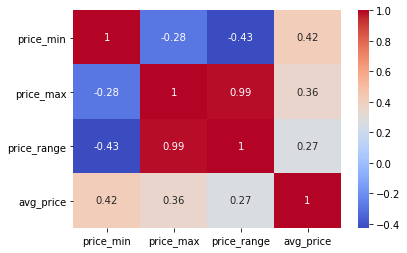

In [360]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [358]:
print(fashionnova_filtered_price_range)

{'Black': (0.98, 89.99, 89.01, 20.64), 'Dress': (0.98, 119.99, 119.01, 24.43), 'Jeans': (2.98, 59.99, 57.01, 17.19), 'Set': (1.98, 89.99, 88.01, 29.01), 'Blue': (2.98, 69.99, 67.01, 19.45), 'Wash': (3.98, 59.99, 56.01, 19.19), 'Mini': (0.98, 119.99, 119.01, 24.42), 'Jumpsuit': (1.98, 89.99, 88.01, 27.85), 'White': (0.98, 79.99, 79.01, 21.17), 'Medium': (4.98, 89.99, 85.01, 19.18)}


In [259]:
print(aday_filtered_price_range)

{'Pants': (80.95, 220.0, 139.05, 174.79), 'It': (28.0, 250.0, 222.0, 145.75), 'Top': (68.0, 175.0, 107.0, 113.67), 'Dress': (160.0, 300.0, 140.0, 194.26), 'T-Shirt': (70.0, 265.0, 195.0, 110.17), 'Shirt': (70.0, 265.0, 195.0, 128.0), 'Pullover': (155.0, 165.0, 10.0, 162.65), 'Wrap': (140.0, 300.0, 160.0, 170.75), 'Leggings': (98.0, 165.0, 67.0, 140.47), 'Tank': (68.0, 115.0, 47.0, 82.86)}


In [260]:
print(thereformation_filtered_price_range)

{'Dress': (98.0, 748.0, 650.0, 268.74), 'Top': (58.0, 188.0, 130.0, 107.77), 'Knit': (38.0, 248.0, 210.0, 108.08), 'Silk': (98.0, 748.0, 650.0, 306.66), 'Linen': (78.0, 298.0, 220.0, 181.33), 'Pant': (148.0, 198.0, 50.0, 173.79), 'Rise': (148.0, 198.0, 50.0, 150.2), 'High': (148.0, 198.0, 50.0, 150.25), 'Skirt': (98.0, 188.0, 90.0, 141.85), 'Sweater': (88.0, 328.0, 240.0, 165.63)}


In [261]:
print(shein_filtered_price_range)

{'Dress': (2.75, 58.0, 55.25, 13.92), 'Print': (3.0, 58.0, 55.0, 13.75), 'Solid': (2.75, 49.0, 46.25, 13.44), 'Top': (3.0, 44.9, 41.9, 12.8), 'Neck': (3.25, 45.4, 42.15, 13.18), 'Sleeve': (4.0, 39.0, 35.0, 13.9), 'Shoulder': (3.0, 50.0, 47.0, 13.49), 'Hem': (3.75, 44.9, 41.15, 13.96), 'Crop': (3.0, 44.0, 41.0, 12.9), 'Tee': (3.25, 50.0, 46.75, 12.62)}


In [262]:
df_fashionnova1 = df_fashionnova.copy()
df_target1 = df_target.copy()
df_kohls1 = df_kohls.copy()
df_aday1 = df_aday.copy()
df_thereformation1 = df_thereformation.copy()
df_shein1 = df_shein.copy()

In [263]:
df_fashionnova1['Company'] = 'FashionNova'
df_target1['Company'] = 'Target'
df_kohls1['Company'] = 'Kohls'
df_aday1['Company'] = 'Aday'
df_thereformation1['Company'] = 'TheFormation'
df_shein1['Company'] = 'Shein'

In [264]:
all_companies = pd.concat([df_fashionnova1, df_target1, df_kohls1, df_aday1, df_thereformation1, df_shein1], ignore_index=True)

<AxesSubplot:>

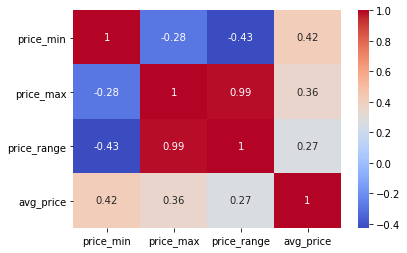

In [361]:
all_companies = df.corr()
sns.heatmap(all_companies, annot=True, cmap='coolwarm')

In [265]:
all_companies.to_csv('All_companies.csv', encoding='utf-8', index=False)

In [266]:
def dict_to_df(data):
    df = pd.DataFrame.from_dict(data, orient='index', columns=['min_price', 'max_price', 'price_range', 'price_avg'])
    df.index.name = 'item'
    df.reset_index(inplace=True)
    return df


In [ ]:
kohls_ranges = dict_to_df(khols_filtered_price_range)
target_ranges = dict_to_df(target_filtered_price_range)
fashionnova_ranges = dict_to_df(fashionnova_filtered_price_range)
aday_ranges = dict_to_df(aday_filtered_price_range)
thereformation_ranges = dict_to_df(thereformation_filtered_price_range)
shein_ranges = dict_to_df(shein_filtered_price_range)

In [ ]:
target_ranges.head()

In [ ]:
kohls_ranges.to_csv('kohls_ranges.csv', encoding='utf-8', index=False)
target_ranges.to_csv('target_ranges.csv', encoding='utf-8', index=False)
fashionnova_ranges.to_csv('fashionnova_ranges.csv', encoding='utf-8', index=False)
aday_ranges.to_csv('aday_ranges.csv', encoding='utf-8', index=False)
thereformation_ranges.to_csv('thereformation_ranges.csv', encoding='utf-8', index=False)
shein_ranges.to_csv('shein_ranges.csv', encoding='utf-8', index=False)